In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

#passive library that generates nicer looking plots
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
#import results
Scen_Res = pd.read_csv(r'C:\Users\tomma\Documents\UW_UFL_Simulation\Sim_Metrics_Results_0513_2_Lane.csv')
Emissions = pd.read_csv(r'C:\Users\tomma\Documents\UW_UFL_Simulation\Emissions\Emissions_Outputs_05_13_2_Lane.csv')
Scen_Res
#Emissions

,EXP,FILE,SCEN,CPI_P1,CPI_G1,CAp1,CAg1,CAt1,CPI_P2,CPI_G2,...,CAp_TNC_p1,CAp_TNC_p2,CAp_Cars_p1,CAp_Cars_p2,Volume,Speed,Park_Rate,HGV_Dwell_Mean,LINK_1_PER_HR,LINK_2_PER_HR
0,1,Seattle_Atomic_Network_Scen1_experiment_1_001.fzp,1,7.700000,1.333333,1.000000,0.888889,0.988506,7.854545,0.545455,...,1.000000,1.000000,1.000000,1.000000,50,20,0.00,300,71.6,76.4
1,2,Seattle_Atomic_Network_Scen1_experiment_2_001.fzp,1,11.200000,2.000000,0.972789,0.923077,0.968750,10.509091,0.909091,...,0.982143,0.883333,0.961039,0.853659,100,20,0.00,300,131.6,134.8
2,3,Seattle_Atomic_Network_Scen1_experiment_3_001.fzp,1,11.466667,1.833333,0.750000,0.687500,0.745902,12.363636,2.545455,...,0.716418,0.817204,0.736111,0.826923,150,20,0.00,300,212.0,194.4
3,4,Seattle_Atomic_Network_Scen1_experiment_4_001.fzp,1,16.933333,2.333333,0.655786,0.424242,0.635135,13.163636,1.818182,...,0.604651,0.613636,0.650538,0.586592,200,20,0.00,300,294.4,264.4
4,5,Seattle_Atomic_Network_Scen1_experiment_5_001.fzp,1,14.866667,2.333333,0.561453,0.341463,0.538847,14.727273,2.545455,...,0.530769,0.554054,0.540670,0.490826,250,20,0.00,300,330.4,339.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,140,Seattle_Atomic_Network_Scen9_experiment_140_00...,9,8.033333,1.666667,0.804196,0.666667,0.791139,10.509091,0.727273,...,0.840909,0.754386,0.755814,0.842105,100,30,0.25,850,142.4,144.8
1292,141,Seattle_Atomic_Network_Scen9_experiment_141_00...,9,12.233333,1.666667,0.637931,0.555556,0.632000,10.472727,1.636364,...,0.772727,0.696203,0.530612,0.652174,150,30,0.25,850,200.0,216.0
1293,142,Seattle_Atomic_Network_Scen9_experiment_142_00...,9,11.800000,2.333333,0.567213,0.500000,0.561562,11.963636,1.272727,...,0.706522,0.626263,0.467005,0.530387,200,30,0.25,850,284.8,263.6
1294,143,Seattle_Atomic_Network_Scen9_experiment_143_00...,9,11.466667,2.666667,0.483029,0.432432,0.478571,12.581818,1.272727,...,0.514493,0.537931,0.432900,0.413793,250,30,0.25,850,341.2,330.8


In [3]:
Scen_Res["LINK_1_PER_HR"] = Scen_Res["LINK_1_PER_HR"].astype(str).astype(float)
Scen_Res["LINK_2_PER_HR"] = Scen_Res["LINK_2_PER_HR"].astype(str).astype(float)

Emissions["LINK_1_PER_HR"] = Emissions["LINK_1_PER_HR"].astype(str).astype(float)
Emissions["LINK_2_PER_HR"] = Emissions["LINK_2_PER_HR"].astype(str).astype(float)
Emissions["TOTAL_B1"] = Emissions["TOTAL_B1"].astype(str).astype(float)
Emissions["TOTAL_B2"] = Emissions["TOTAL_B2"].astype(str).astype(float)

In [4]:
# We only want to review occupancy rate during the study period (2.5 hours). Because some vehicles have parked during the 
# warm-up period, we want to zero that time out (so we don't have occupancy rates > 1.0)

#Scen_Res[29:87].values[Scen_Res[29:87].values > 1.000] = 1.000
Scen_Res.loc[Scen_Res['PL_11_100'] > 1, 'PL_11_100'] = 1
Scen_Res.loc[Scen_Res['PL_11_640'] > 1, 'PL_11_640'] = 1
Scen_Res.loc[Scen_Res['PL_11_650'] > 1, 'PL_11_650'] = 1

Scen_Res.loc[Scen_Res['PL_12_100'] > 1, 'PL_12_100'] = 1
Scen_Res.loc[Scen_Res['PL_12_640'] > 1, 'PL_12_640'] = 1
Scen_Res.loc[Scen_Res['PL_12_650'] > 1, 'PL_12_650'] = 1

Scen_Res.loc[Scen_Res['PL_13_100'] > 1, 'PL_13_100'] = 1
Scen_Res.loc[Scen_Res['PL_13_640'] > 1, 'PL_13_640'] = 1
Scen_Res.loc[Scen_Res['PL_13_650'] > 1, 'PL_13_650'] = 1

Scen_Res.loc[Scen_Res['PL_14_100'] > 1, 'PL_14_100'] = 1
Scen_Res.loc[Scen_Res['PL_14_640'] > 1, 'PL_14_640'] = 1
Scen_Res.loc[Scen_Res['PL_14_650'] > 1, 'PL_14_650'] = 1

Scen_Res.loc[Scen_Res['PL_15_100'] > 1, 'PL_15_100'] = 1
Scen_Res.loc[Scen_Res['PL_15_640'] > 1, 'PL_15_640'] = 1
Scen_Res.loc[Scen_Res['PL_15_650'] > 1, 'PL_15_650'] = 1

Scen_Res.loc[Scen_Res['PL_16_100'] > 1, 'PL_16_100'] = 1
Scen_Res.loc[Scen_Res['PL_16_640'] > 1, 'PL_16_640'] = 1
Scen_Res.loc[Scen_Res['PL_16_650'] > 1, 'PL_16_650'] = 1

Scen_Res.loc[Scen_Res['PL_17_100'] > 1, 'PL_17_100'] = 1
Scen_Res.loc[Scen_Res['PL_17_640'] > 1, 'PL_17_640'] = 1
Scen_Res.loc[Scen_Res['PL_17_650'] > 1, 'PL_17_650'] = 1

Scen_Res.loc[Scen_Res['PL_18_100'] > 1, 'PL_18_100'] = 1
Scen_Res.loc[Scen_Res['PL_18_640'] > 1, 'PL_18_640'] = 1
Scen_Res.loc[Scen_Res['PL_18_650'] > 1, 'PL_18_650'] = 1

Scen_Res.loc[Scen_Res['PL_19_100'] > 1, 'PL_19_100'] = 1
Scen_Res.loc[Scen_Res['PL_19_640'] > 1, 'PL_19_640'] = 1
Scen_Res.loc[Scen_Res['PL_19_650'] > 1, 'PL_19_650'] = 1

Scen_Res.loc[Scen_Res['PL_20_100'] > 1, 'PL_20_100'] = 1
Scen_Res.loc[Scen_Res['PL_20_640'] > 1, 'PL_20_640'] = 1
Scen_Res.loc[Scen_Res['PL_20_650'] > 1, 'PL_20_650'] = 1

Scen_Res.loc[Scen_Res['PL_21_100'] > 1, 'PL_21_100'] = 1
Scen_Res.loc[Scen_Res['PL_21_640'] > 1, 'PL_21_640'] = 1
Scen_Res.loc[Scen_Res['PL_21_650'] > 1, 'PL_21_650'] = 1

Scen_Res.loc[Scen_Res['PL_22_100'] > 1, 'PL_22_100'] = 1
Scen_Res.loc[Scen_Res['PL_22_640'] > 1, 'PL_22_640'] = 1
Scen_Res.loc[Scen_Res['PL_22_650'] > 1, 'PL_22_650'] = 1

Scen_Res.loc[Scen_Res['PL_23_100'] > 1, 'PL_23_100'] = 1
Scen_Res.loc[Scen_Res['PL_23_640'] > 1, 'PL_23_640'] = 1
Scen_Res.loc[Scen_Res['PL_23_650'] > 1, 'PL_23_650'] = 1

Scen_Res.loc[Scen_Res['PL_24_100'] > 1, 'PL_24_100'] = 1
Scen_Res.loc[Scen_Res['PL_24_640'] > 1, 'PL_24_640'] = 1
Scen_Res.loc[Scen_Res['PL_24_650'] > 1, 'PL_24_650'] = 1

Scen_Res.loc[Scen_Res['PL_25_100'] > 1, 'PL_25_100'] = 1
Scen_Res.loc[Scen_Res['PL_25_640'] > 1, 'PL_25_640'] = 1
Scen_Res.loc[Scen_Res['PL_25_650'] > 1, 'PL_25_650'] = 1

Scen_Res.loc[Scen_Res['PL_26_100'] > 1, 'PL_26_100'] = 1
Scen_Res.loc[Scen_Res['PL_26_640'] > 1, 'PL_26_640'] = 1
Scen_Res.loc[Scen_Res['PL_26_650'] > 1, 'PL_26_650'] = 1

Scen_Res.loc[Scen_Res['PL_27_100'] > 1, 'PL_27_100'] = 1
Scen_Res.loc[Scen_Res['PL_27_640'] > 1, 'PL_27_640'] = 1
Scen_Res.loc[Scen_Res['PL_27_650'] > 1, 'PL_27_650'] = 1

Scen_Res.loc[Scen_Res['PL_28_100'] > 1, 'PL_28_100'] = 1
Scen_Res.loc[Scen_Res['PL_28_640'] > 1, 'PL_28_640'] = 1
Scen_Res.loc[Scen_Res['PL_28_650'] > 1, 'PL_28_650'] = 1

Scen_Res.loc[Scen_Res['PL_30_100'] > 1, 'PL_30_100'] = 1
Scen_Res.loc[Scen_Res['PL_30_640'] > 1, 'PL_30_640'] = 1
Scen_Res.loc[Scen_Res['PL_30_650'] > 1, 'PL_30_650'] = 1

Scen_Res.loc[Scen_Res['PL_31_100'] > 1, 'PL_31_100'] = 1
Scen_Res.loc[Scen_Res['PL_31_640'] > 1, 'PL_31_640'] = 1
Scen_Res.loc[Scen_Res['PL_31_650'] > 1, 'PL_31_650'] = 1

In [5]:
Scen1_Filter = (Scen_Res['SCEN'] == 1)
Scen_1 = Scen_Res[Scen1_Filter]

Scen2_Filter = (Scen_Res['SCEN'] == 2)
Scen_2 = Scen_Res[Scen2_Filter]

Scen3_Filter = (Scen_Res['SCEN'] == 3)
Scen_3 = Scen_Res[Scen3_Filter]

Scen4_Filter = (Scen_Res['SCEN'] == 4)
Scen_4 = Scen_Res[Scen4_Filter]

Scen5_Filter = (Scen_Res['SCEN'] == 5)
Scen_5 = Scen_Res[Scen5_Filter]

Scen6_Filter = (Scen_Res['SCEN'] == 6)
Scen_6 = Scen_Res[Scen6_Filter]

Scen7_Filter = (Scen_Res['SCEN'] == 7)
Scen_7 = Scen_Res[Scen7_Filter]

Scen8_Filter = (Scen_Res['SCEN'] == 8)
Scen_8 = Scen_Res[Scen8_Filter]

Scen9_Filter = (Scen_Res['SCEN'] == 9)
Scen_9 = Scen_Res[Scen9_Filter]

In [6]:
Scen_1['PL_11_100'].describe()

count    144.000000
mean       0.665764
std        0.195912
min        0.133099
25%        0.557204
50%        0.698714
75%        0.817348
max        1.000000
Name: PL_11_100, dtype: float64

In [7]:
Scen_Res.dropna()
Scen_Res

,EXP,FILE,SCEN,CPI_P1,CPI_G1,CAp1,CAg1,CAt1,CPI_P2,CPI_G2,...,CAp_TNC_p1,CAp_TNC_p2,CAp_Cars_p1,CAp_Cars_p2,Volume,Speed,Park_Rate,HGV_Dwell_Mean,LINK_1_PER_HR,LINK_2_PER_HR
0,1,Seattle_Atomic_Network_Scen1_experiment_1_001.fzp,1,7.700000,1.333333,1.000000,0.888889,0.988506,7.854545,0.545455,...,1.000000,1.000000,1.000000,1.000000,50,20,0.00,300,71.6,76.4
1,2,Seattle_Atomic_Network_Scen1_experiment_2_001.fzp,1,11.200000,2.000000,0.972789,0.923077,0.968750,10.509091,0.909091,...,0.982143,0.883333,0.961039,0.853659,100,20,0.00,300,131.6,134.8
2,3,Seattle_Atomic_Network_Scen1_experiment_3_001.fzp,1,11.466667,1.833333,0.750000,0.687500,0.745902,12.363636,2.545455,...,0.716418,0.817204,0.736111,0.826923,150,20,0.00,300,212.0,194.4
3,4,Seattle_Atomic_Network_Scen1_experiment_4_001.fzp,1,16.933333,2.333333,0.655786,0.424242,0.635135,13.163636,1.818182,...,0.604651,0.613636,0.650538,0.586592,200,20,0.00,300,294.4,264.4
4,5,Seattle_Atomic_Network_Scen1_experiment_5_001.fzp,1,14.866667,2.333333,0.561453,0.341463,0.538847,14.727273,2.545455,...,0.530769,0.554054,0.540670,0.490826,250,20,0.00,300,330.4,339.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,140,Seattle_Atomic_Network_Scen9_experiment_140_00...,9,8.033333,1.666667,0.804196,0.666667,0.791139,10.509091,0.727273,...,0.840909,0.754386,0.755814,0.842105,100,30,0.25,850,142.4,144.8
1292,141,Seattle_Atomic_Network_Scen9_experiment_141_00...,9,12.233333,1.666667,0.637931,0.555556,0.632000,10.472727,1.636364,...,0.772727,0.696203,0.530612,0.652174,150,30,0.25,850,200.0,216.0
1293,142,Seattle_Atomic_Network_Scen9_experiment_142_00...,9,11.800000,2.333333,0.567213,0.500000,0.561562,11.963636,1.272727,...,0.706522,0.626263,0.467005,0.530387,200,30,0.25,850,284.8,263.6
1294,143,Seattle_Atomic_Network_Scen9_experiment_143_00...,9,11.466667,2.666667,0.483029,0.432432,0.478571,12.581818,1.272727,...,0.514493,0.537931,0.432900,0.413793,250,30,0.25,850,341.2,330.8


In [8]:
Test = pd.read_csv(r'C:\Users\tomma\Documents\UW_UFL_Simulation\Sim_Metrics_Results_0513_2_Lane.csv')
Test

,EXP,FILE,SCEN,CPI_P1,CPI_G1,CAp1,CAg1,CAt1,CPI_P2,CPI_G2,...,CAp_TNC_p1,CAp_TNC_p2,CAp_Cars_p1,CAp_Cars_p2,Volume,Speed,Park_Rate,HGV_Dwell_Mean,LINK_1_PER_HR,LINK_2_PER_HR
0,1,Seattle_Atomic_Network_Scen1_experiment_1_001.fzp,1,7.700000,1.333333,1.000000,0.888889,0.988506,7.854545,0.545455,...,1.000000,1.000000,1.000000,1.000000,50,20,0.00,300,71.6,76.4
1,2,Seattle_Atomic_Network_Scen1_experiment_2_001.fzp,1,11.200000,2.000000,0.972789,0.923077,0.968750,10.509091,0.909091,...,0.982143,0.883333,0.961039,0.853659,100,20,0.00,300,131.6,134.8
2,3,Seattle_Atomic_Network_Scen1_experiment_3_001.fzp,1,11.466667,1.833333,0.750000,0.687500,0.745902,12.363636,2.545455,...,0.716418,0.817204,0.736111,0.826923,150,20,0.00,300,212.0,194.4
3,4,Seattle_Atomic_Network_Scen1_experiment_4_001.fzp,1,16.933333,2.333333,0.655786,0.424242,0.635135,13.163636,1.818182,...,0.604651,0.613636,0.650538,0.586592,200,20,0.00,300,294.4,264.4
4,5,Seattle_Atomic_Network_Scen1_experiment_5_001.fzp,1,14.866667,2.333333,0.561453,0.341463,0.538847,14.727273,2.545455,...,0.530769,0.554054,0.540670,0.490826,250,20,0.00,300,330.4,339.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,140,Seattle_Atomic_Network_Scen9_experiment_140_00...,9,8.033333,1.666667,0.804196,0.666667,0.791139,10.509091,0.727273,...,0.840909,0.754386,0.755814,0.842105,100,30,0.25,850,142.4,144.8
1292,141,Seattle_Atomic_Network_Scen9_experiment_141_00...,9,12.233333,1.666667,0.637931,0.555556,0.632000,10.472727,1.636364,...,0.772727,0.696203,0.530612,0.652174,150,30,0.25,850,200.0,216.0
1293,142,Seattle_Atomic_Network_Scen9_experiment_142_00...,9,11.800000,2.333333,0.567213,0.500000,0.561562,11.963636,1.272727,...,0.706522,0.626263,0.467005,0.530387,200,30,0.25,850,284.8,263.6
1294,143,Seattle_Atomic_Network_Scen9_experiment_143_00...,9,11.466667,2.666667,0.483029,0.432432,0.478571,12.581818,1.272727,...,0.514493,0.537931,0.432900,0.413793,250,30,0.25,850,341.2,330.8


In [9]:
Scen1_Filter = (Test['SCEN'] == 1)
Test_S1 = Test[Scen1_Filter]

Scen2_Filter = (Test['SCEN'] == 2)
Test_S2 = Test[Scen2_Filter]

Scen3_Filter = (Test['SCEN'] == 3)
Test_S3 = Test[Scen3_Filter]

Scen4_Filter = (Test['SCEN'] == 4)
Test_S4 = Test[Scen4_Filter]

Scen5_Filter = (Test['SCEN'] == 5)
Test_S5 = Test[Scen5_Filter]

Scen6_Filter = (Test['SCEN'] == 6)
Test_S6 = Test[Scen6_Filter]

Scen7_Filter = (Test['SCEN'] == 7)
Test_S7 = Test[Scen7_Filter]

Scen8_Filter = (Test['SCEN'] == 8)
Test_S8 = Test[Scen8_Filter]

Scen9_Filter = (Test['SCEN'] == 9)
Test_S9 = Test[Scen9_Filter]


Vol50_Filter = ((Test['LINK_1_PER_HR'] >= 0) & (Test['LINK_1_PER_HR'] <= 100)) | ((Test['LINK_2_PER_HR'] >= 0) & (Test['LINK_1_PER_HR'] <= 100))
Test_V1 = Test[Vol50_Filter]

Vol100_Filter = ((Test['LINK_1_PER_HR'] >= 100) & (Test['LINK_1_PER_HR'] <= 160)) | ((Test['LINK_2_PER_HR'] >= 100) & (Test['LINK_1_PER_HR'] <= 160))
Test_V2 = Test[Vol100_Filter]

Vol150_Filter = ((Test['LINK_1_PER_HR'] >= 160) & (Test['LINK_1_PER_HR'] <= 235)) | ((Test['LINK_2_PER_HR'] >= 160) & (Test['LINK_1_PER_HR'] <= 235))
Test_V3 = Test[Vol150_Filter]

Vol200_Filter = ((Test['LINK_1_PER_HR'] >= 235) & (Test['LINK_1_PER_HR'] <= 300)) | ((Test['LINK_2_PER_HR'] >= 235) & (Test['LINK_1_PER_HR'] <= 300))
Test_V4 = Test[Vol200_Filter]

Vol250_Filter = ((Test['LINK_1_PER_HR'] >= 300) & (Test['LINK_1_PER_HR'] <= 365)) | ((Test['LINK_2_PER_HR'] >= 300) & (Test['LINK_1_PER_HR'] <= 365))
Test_V5 = Test[Vol250_Filter]

Vol300_Filter = ((Test['LINK_1_PER_HR'] >= 365) & (Test['LINK_1_PER_HR'] <= 450)) | ((Test['LINK_2_PER_HR'] >= 365) & (Test['LINK_1_PER_HR'] <= 450))
Test_V6 = Test[Vol300_Filter]


In [10]:
Em_Scen1_Filter = (Emissions['SCEN'] == 1)
Emissions_S1 = Emissions[Em_Scen1_Filter]

Em_Scen2_Filter = (Emissions['SCEN'] == 2)
Emissions_S2 = Emissions[Em_Scen2_Filter]

Em_Scen3_Filter = (Emissions['SCEN'] == 3)
Emissions_S3 = Emissions[Em_Scen3_Filter]

Em_Scen4_Filter = (Emissions['SCEN'] == 4)
Emissions_S4 = Emissions[Em_Scen4_Filter]

Em_Scen5_Filter = (Emissions['SCEN'] == 5)
Emissions_S5 = Emissions[Em_Scen5_Filter]

Em_Scen6_Filter = (Emissions['SCEN'] == 6)
Emissions_S6 = Emissions[Em_Scen6_Filter]

Em_Scen7_Filter = (Emissions['SCEN'] == 7)
Emissions_S7 = Emissions[Em_Scen7_Filter]

Em_Scen8_Filter = (Emissions['SCEN'] == 8)
Emissions_S8 = Emissions[Em_Scen8_Filter]

Em_Scen9_Filter = (Emissions['SCEN'] == 9)
Emissions_S9 = Emissions[Em_Scen9_Filter]


Vol50_Filter = ((Emissions['LINK_1_PER_HR'] >= 0) & (Emissions['LINK_1_PER_HR'] <= 100)) | ((Emissions['LINK_2_PER_HR'] >= 0) & (Emissions['LINK_1_PER_HR'] <= 100))
Emissions_V1 = Emissions[Vol50_Filter]

Vol100_Filter = ((Emissions['LINK_1_PER_HR'] >= 100) & (Emissions['LINK_1_PER_HR'] <= 160)) | ((Emissions['LINK_2_PER_HR'] >= 100) & (Emissions['LINK_1_PER_HR'] <= 160))
Emissions_V2 = Emissions[Vol100_Filter]

Vol150_Filter = ((Emissions['LINK_1_PER_HR'] >= 160) & (Emissions['LINK_1_PER_HR'] <= 235)) | ((Emissions['LINK_2_PER_HR'] >= 160) & (Emissions['LINK_1_PER_HR'] <= 235))
Emissions_V3 = Emissions[Vol150_Filter]

Vol200_Filter = ((Emissions['LINK_1_PER_HR'] >= 235) & (Emissions['LINK_1_PER_HR'] <= 300)) | ((Emissions['LINK_2_PER_HR'] >= 235) & (Emissions['LINK_1_PER_HR'] <= 300))
Emissions_V4 = Emissions[Vol200_Filter]

Vol250_Filter = ((Emissions['LINK_1_PER_HR'] >= 300) & (Emissions['LINK_1_PER_HR'] <= 365)) | ((Emissions['LINK_2_PER_HR'] >= 300) & (Emissions['LINK_1_PER_HR'] <= 365))
Emissions_V5 = Emissions[Vol250_Filter]

Vol300_Filter = ((Emissions['LINK_1_PER_HR'] >= 365) & (Emissions['LINK_1_PER_HR'] <= 450)) | ((Emissions['LINK_2_PER_HR'] >= 365) & (Emissions['LINK_1_PER_HR'] <= 450))
Emissions_V6 = Emissions[Vol300_Filter]

In [167]:
# x-values
x1 = Test['Volume']
x2 = Test['Park_Rate']
x3 = Test['HGV_Dwell_Mean']
x4 = Test['Speed']
x5 = Test['LINK_1_PER_HR']
x6 = Test['LINK_2_PER_HR']
x2_1 = Test_V1['Park_Rate']
x2_2 = Test_V2['Park_Rate']
x2_3 = Test_V3['Park_Rate']
x2_4 = Test_V4['Park_Rate']
x2_5 = Test_V5['Park_Rate']
x2_6 = Test_V6['Park_Rate']

# y-values
y1 = Test['CPI_P1']
y2 = Test['CPI_P2']
y3 = Test['CPI_G1']
y4 = Test['CPI_G2']
y5 = Test['CAp1']
y6 = Test['CAp2']
y7 = Test['CAg1']
y8 = Test['CAg2']

y1_1 = Test_V1['CPI_P1']
y2_1 = Test_V1['CPI_P2']
y3_1 = Test_V1['CPI_G1']
y4_1 = Test_V1['CPI_G2']
y5_1 = Test_V1['CAp1']
y6_1 = Test_V1['CAp2']
y7_1 = Test_V1['CAg1']
y8_1 = Test_V1['CAg2']

y1_2 = Test_V2['CPI_P1']
y2_2 = Test_V2['CPI_P2']
y3_2 = Test_V2['CPI_G1']
y4_2 = Test_V2['CPI_G2']
y5_2 = Test_V2['CAp1']
y6_2 = Test_V2['CAp2']
y7_2 = Test_V2['CAg1']
y8_2 = Test_V2['CAg2']

y1_3 = Test_V3['CPI_P1']
y2_3 = Test_V3['CPI_P2']
y3_3 = Test_V3['CPI_G1']
y4_3 = Test_V3['CPI_G2']
y5_3 = Test_V3['CAp1']
y6_3 = Test_V3['CAp2']
y7_3 = Test_V3['CAg1']
y8_3 = Test_V3['CAg2']

y1_4 = Test_V4['CPI_P1']
y2_4 = Test_V4['CPI_P2']
y3_4 = Test_V4['CPI_G1']
y4_4 = Test_V4['CPI_G2']
y5_4 = Test_V4['CAp1']
y6_4 = Test_V4['CAp2']
y7_4 = Test_V4['CAg1']
y8_4 = Test_V4['CAg2']

y1_5 = Test_V5['CPI_P1']
y2_5 = Test_V5['CPI_P2']
y3_5 = Test_V5['CPI_G1']
y4_5 = Test_V5['CPI_G2']
y5_5 = Test_V5['CAp1']
y6_5 = Test_V5['CAp2']
y7_5 = Test_V5['CAg1']
y8_5 = Test_V5['CAg2']

y1_6 = Test_V6['CPI_P1']
y2_6 = Test_V6['CPI_P2']
y3_6 = Test_V6['CPI_G1']
y4_6 = Test_V6['CPI_G2']
y5_6 = Test_V6['CAp1']
y6_6 = Test_V6['CAp2']
y7_6 = Test_V6['CAg1']
y8_6 = Test_V6['CAg2']

y9 = Test['Pax1']
y10 = Test['Pax2']
y11 = Test['Goods1']
y12 = Test['Goods2']
y13 = Test['PaxVeh']
y14 = Test['PaxVeh2']
y15 = Test['GoodsVeh1']
y16 = Test['GoodsVeh2']
y17 = Test['fv_ip1']
y18 = Test['fv_ip2']
y19 = Test['fv_ig1']
y20 = Test['fv_ig2']

max = 7

In [12]:
# x-values
Ex1 = Emissions['Volume']
Ex2 = Emissions['Park_Rate']
Ex3 = Emissions['HGV_Dwell_Mean']
Ex4 = Emissions['Speed']
Ex5 = Emissions['LINK_1_PER_HR']
Ex6 = Emissions['LINK_2_PER_HR']
Ex2_1 = Emissions_V1['Park_Rate']
Ex2_2 = Emissions_V2['Park_Rate']
Ex2_3 = Emissions_V3['Park_Rate']
Ex2_4 = Emissions_V4['Park_Rate']
Ex2_5 = Emissions_V5['Park_Rate']
Ex2_6 = Emissions_V6['Park_Rate']

# Ey-values
Ey1 = Emissions['TOTAL_B1']
Ey2 = Emissions['TOTAL_B2']
Ey3 = Emissions['B1_100']
Ey4 = Emissions['B1_300']
Ey5 = Emissions['B1_640']
Ey6 = Emissions['B1_CV']
Ey7 = Emissions['B2_100']
Ey8 = Emissions['B2_300']
Ey9 = Emissions['B2_640']
Ey10 = Emissions['B2_CV']

Ey1_1 = Emissions_V1['TOTAL_B1']
Ey2_1 = Emissions_V1['TOTAL_B2']
Ey3_1 = Emissions_V1['B1_100']
Ey4_1 = Emissions_V1['B1_300']
Ey5_1 = Emissions_V1['B1_640']
Ey6_1 = Emissions_V1['B1_CV']
Ey7_1 = Emissions_V1['B2_100']
Ey8_1 = Emissions_V1['B2_300']
Ey9_1 = Emissions_V1['B2_640']
Ey10_1 = Emissions_V1['B2_CV']

Ey1_2 = Emissions_V2['TOTAL_B1']
Ey2_2 = Emissions_V2['TOTAL_B2']
Ey3_2 = Emissions_V2['B1_100']
Ey4_2 = Emissions_V2['B1_300']
Ey5_2 = Emissions_V2['B1_640']
Ey6_2 = Emissions_V2['B1_CV']
Ey7_2 = Emissions_V2['B2_100']
Ey8_2 = Emissions_V2['B2_300']
Ey9_2 = Emissions_V2['B2_640']
Ey10_2 = Emissions_V2['B2_CV']

Ey1_3 = Emissions_V3['TOTAL_B1']
Ey2_3 = Emissions_V3['TOTAL_B2']
Ey3_3 = Emissions_V3['B1_100']
Ey4_3 = Emissions_V3['B1_300']
Ey5_3 = Emissions_V3['B1_640']
Ey6_3 = Emissions_V3['B1_CV']
Ey7_3 = Emissions_V3['B2_100']
Ey8_3 = Emissions_V3['B2_300']
Ey9_3 = Emissions_V3['B2_640']
Ey10_3 = Emissions_V3['B2_CV']

Ey1_4 = Emissions_V4['TOTAL_B1']
Ey2_4 = Emissions_V4['TOTAL_B2']
Ey3_4 = Emissions_V4['B1_100']
Ey4_4 = Emissions_V4['B1_300']
Ey5_4 = Emissions_V4['B1_640']
Ey6_4 = Emissions_V4['B1_CV']
Ey7_4 = Emissions_V4['B2_100']
Ey8_4 = Emissions_V4['B2_300']
Ey9_4 = Emissions_V4['B2_640']
Ey10_4 = Emissions_V4['B2_CV']

Ey1_5 = Emissions_V5['TOTAL_B1']
Ey2_5 = Emissions_V5['TOTAL_B2']
Ey3_5 = Emissions_V5['B1_100']
Ey4_5 = Emissions_V5['B1_300']
Ey5_5 = Emissions_V5['B1_640']
Ey6_5 = Emissions_V5['B1_CV']
Ey7_5 = Emissions_V5['B2_100']
Ey8_5 = Emissions_V5['B2_300']
Ey9_5 = Emissions_V5['B2_640']
Ey10_5 = Emissions_V5['B2_CV']

Ey1_6 = Emissions_V6['TOTAL_B1']
Ey2_6 = Emissions_V6['TOTAL_B2']
Ey3_6 = Emissions_V6['B1_100']
Ey4_6 = Emissions_V6['B1_300']
Ey5_6 = Emissions_V6['B1_640']
Ey6_6 = Emissions_V6['B1_CV']
Ey7_6 = Emissions_V6['B2_100']
Ey8_6 = Emissions_V6['B2_300']
Ey9_6 = Emissions_V6['B2_640']
Ey10_6 = Emissions_V6['B2_CV']

max = 7

In [116]:
plt.rcParams['figure.figsize'] = [18, 12]

In [124]:
SMALL_SIZE = 25
MEDIUM_SIZE = 29
BIGGER_SIZE = 36

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Sensitivity Analysis - Blockface 2 By Volume

#### Volume vs CPI_Passengers

Text(0.5, 1.0, 'Volume vs Passenger Curb Productivity Index (CPIp)')

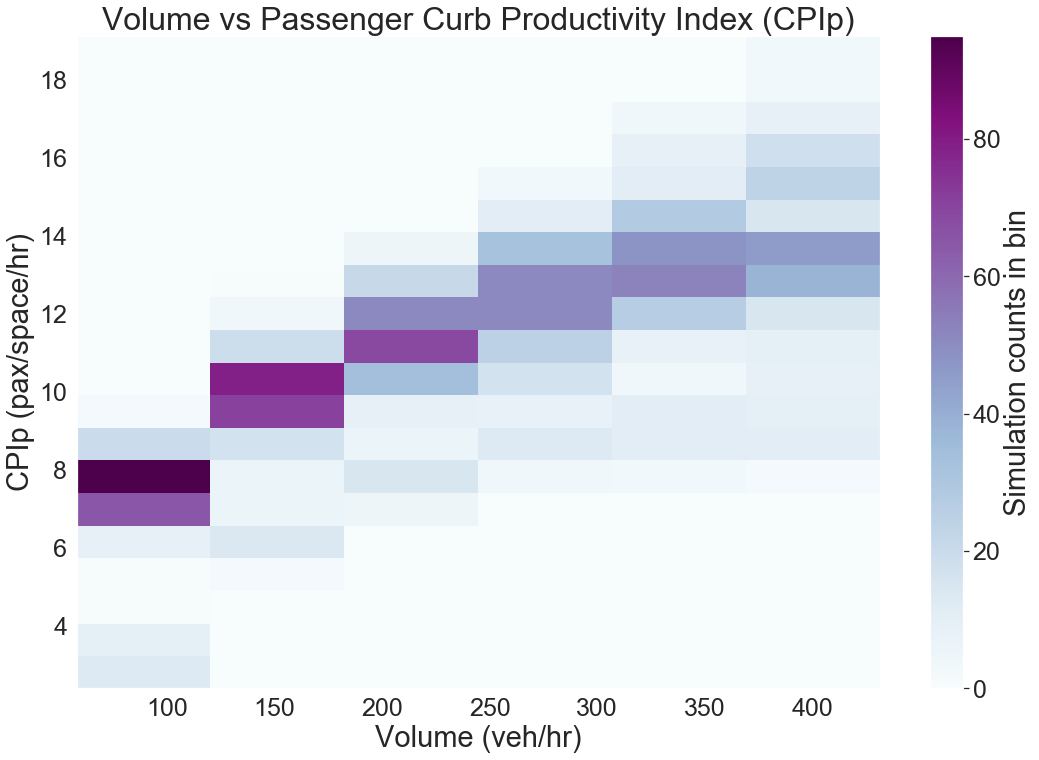

In [125]:
# Blockface 2: Volume vs CPI_P
plot2 = plt.hist2d(x6, y2, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('Simulation counts in bin')
plt.xlabel('Volume (veh/hr)')
plt.ylabel('CPIp (pax/space/hr)')
plt.title('Volume vs Passenger Curb Productivity Index (CPIp)',fontsize=32)

#### Volume vs CA_Passengers

Text(0.5, 1.0, 'Volume vs Passenger Curb Accessibility (CAp)')

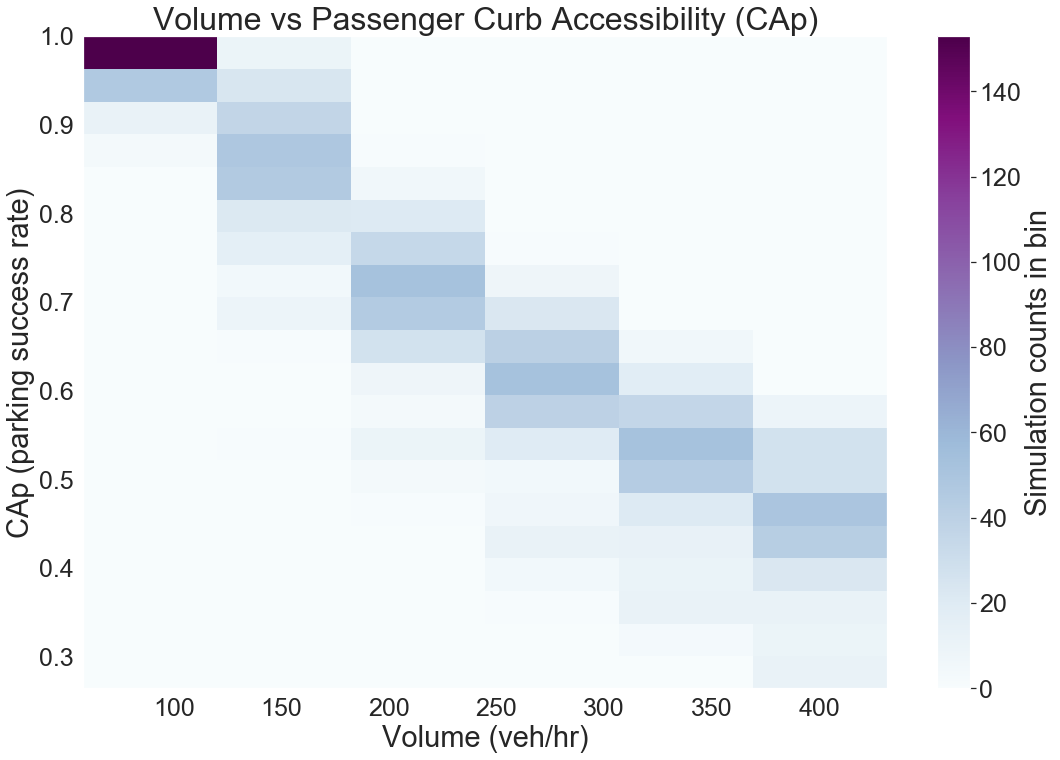

In [129]:
# Blockface 2: Volume vs CA_P
plot2 = plt.hist2d(x6, y6, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('Simulation counts in bin')
plt.xlabel('Volume (veh/hr)')
plt.ylabel('CAp (parking success rate)')
plt.title('Volume vs Passenger Curb Accessibility (CAp)',fontsize=32)

#### Volume vs CPI_Goods

Text(0.5, 1.0, 'Volume vs Goods Curb Productivity Index (CPIg)')

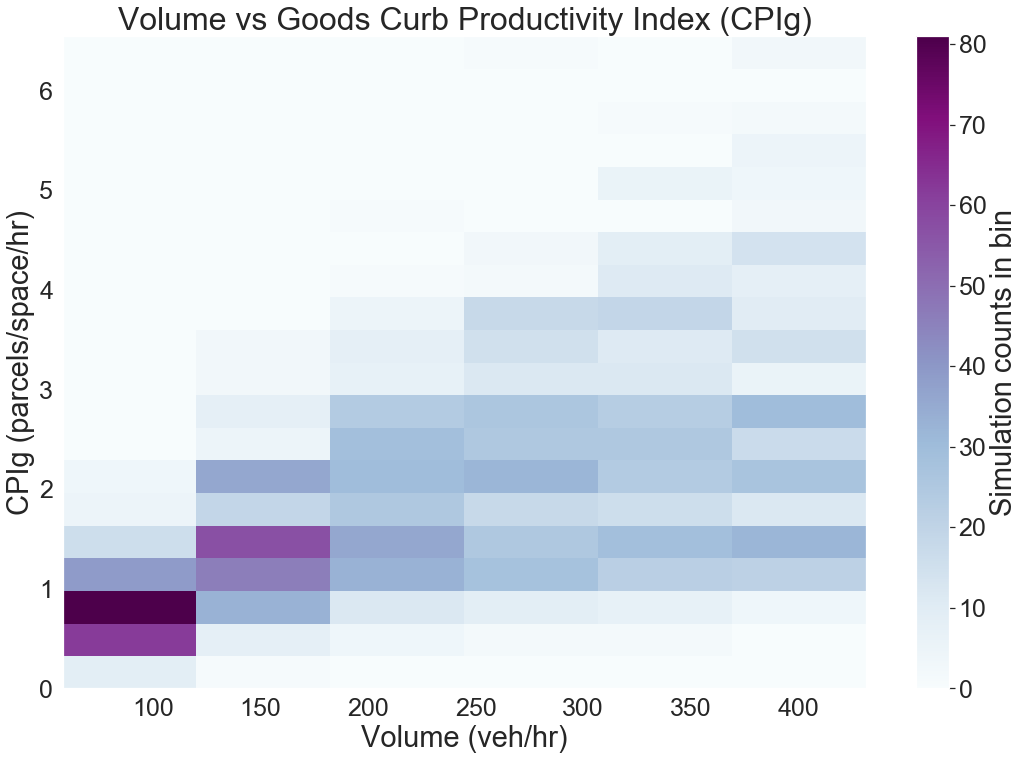

In [128]:
# Blockface 2: Volume vs CPI_G
plot2 = plt.hist2d(x6, y4, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('Simulation counts in bin')
plt.xlabel('Volume (veh/hr)')
plt.ylabel('CPIg (parcels/space/hr)')
plt.title('Volume vs Goods Curb Productivity Index (CPIg)',fontsize=32)

#### Volume vs CA_Goods

Text(0.5, 1.0, 'Volume vs Goods Curb Accessibility (CAg)')

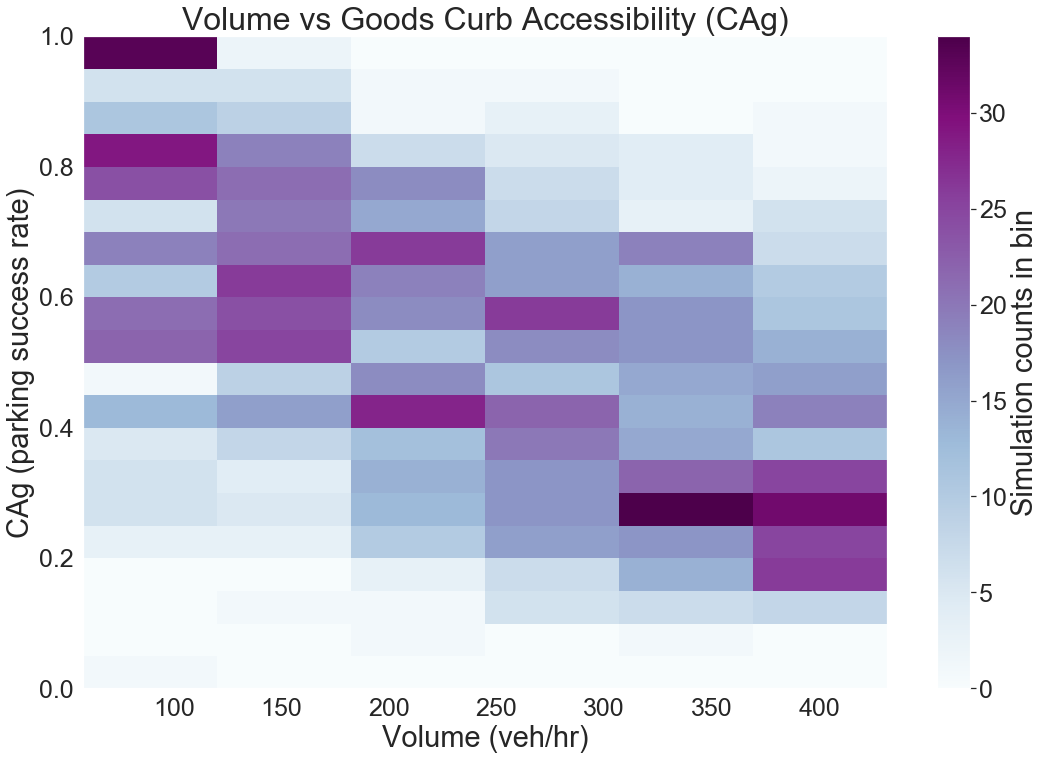

In [146]:
# Blockface 2: Volume vs CA_G
plot2 = plt.hist2d(x6, y8, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('Simulation counts in bin')
plt.xlabel('Volume (veh/hr)')
plt.ylabel('CAg (parking success rate)')
plt.title('Volume vs Goods Curb Accessibility (CAg)',fontsize=32)

#### Volume vs Emissions

Text(0.5, 1.0, '2D Histogram of Volume vs Emissions')

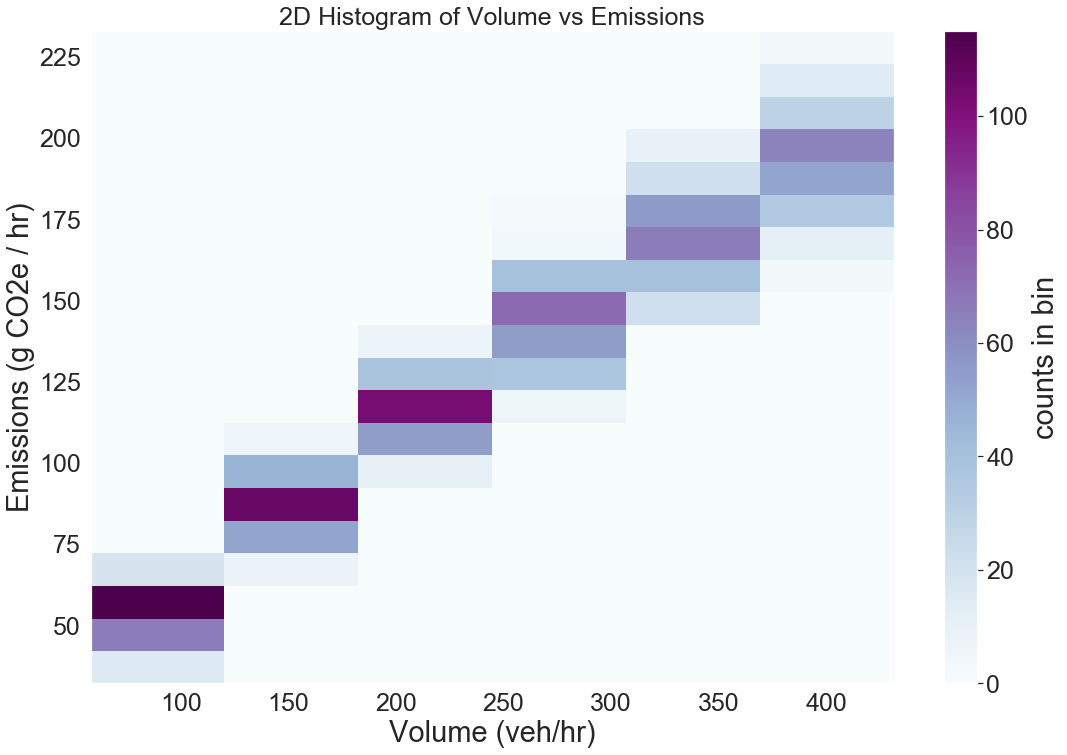

In [140]:
# Blockface 2: Volume vs Total Emissions
plot2 = plt.hist2d(Ex6, Ey2, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Volume (veh/hr)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('2D Histogram of Volume vs Emissions')

### Sensitivity Analysis - Blockface 1 By Volume

#### Volume vs CPI_Passengers

Text(0.5, 1.0, '2D Histogram of Volume vs CPIp')

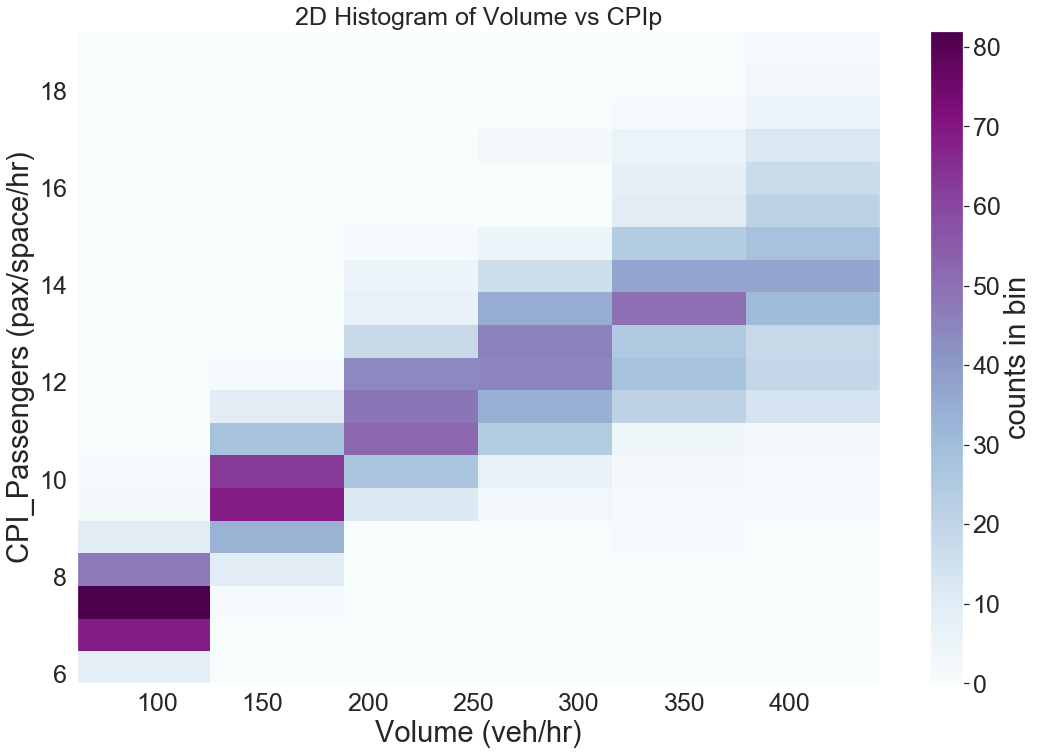

In [142]:
# Blockface 1: Volume vs CPI_P
plot2 = plt.hist2d(x5, y1, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Volume (veh/hr)')
plt.ylabel('CPI_Passengers (pax/space/hr)')
plt.title('2D Histogram of Volume vs CPIp')

#### Volume vs CA_Passengers

In [ ]:
# Blockface 1: Volume vs CA_P
plot2 = plt.hist2d(x5, y5, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Volume (veh/hr)')
plt.ylabel('CA_Passengers')
plt.title('2D Histogram of Volume vs CA_P')

#### Volume vs CPI_Goods

In [ ]:
# Blockface 1: Volume vs CPI_G
plot2 = plt.hist2d(x5, y3, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Volume (veh/hr)')
plt.ylabel('CPI_Goods (goods/space/hr)')
plt.title('2D Histogram of Volume vs CPI_G')

#### Volume vs CA_Goods

In [ ]:
# Blockface 1: Volume vs CA_G
plot2 = plt.hist2d(x5, y7, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Volume (veh/hr)')
plt.ylabel('CA_Goods')
plt.title('2D Histogram of Volume vs CA_G')

#### Volume vs Emissions

Text(0.5, 1.0, '2D Histogram of Volume vs Emissions')

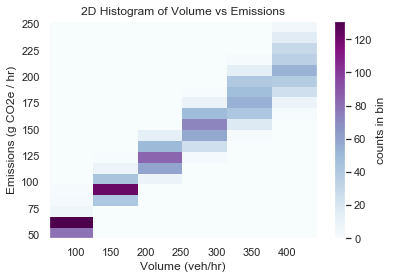

In [10]:
# Blockface 1: Volume vs Total Emissions
plot2 = plt.hist2d(Ex5, Ey1, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Volume (veh/hr)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('2D Histogram of Volume vs Emissions')

### Sensitivity Analysis - Blockface 2 By Parking Rate

#### Parking Rate vs CPI_Passengers

Text(0.5, 1.0, 'Parking Rate vs Passenger Curb Productivity Index (CPIp)')

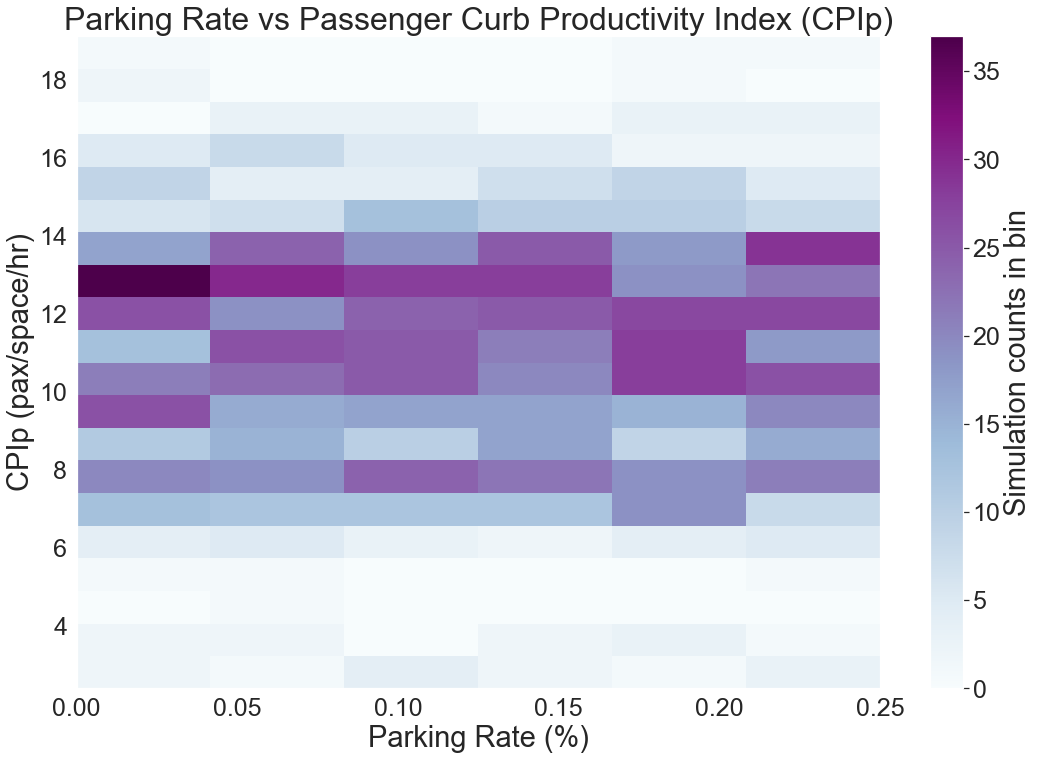

In [145]:
# Blockface 2: Parking Rate vs CPI_P
plot2 = plt.hist2d(x2, y2, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('Simulation counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPIp (pax/space/hr)')
plt.title('Parking Rate vs Passenger Curb Productivity Index (CPIp)', fontsize=32)

#### Parking Rate vs CA_Passengers

Text(0.5, 1.0, 'Parking Rate vs Passenger Curb Accessibility (CAp)')

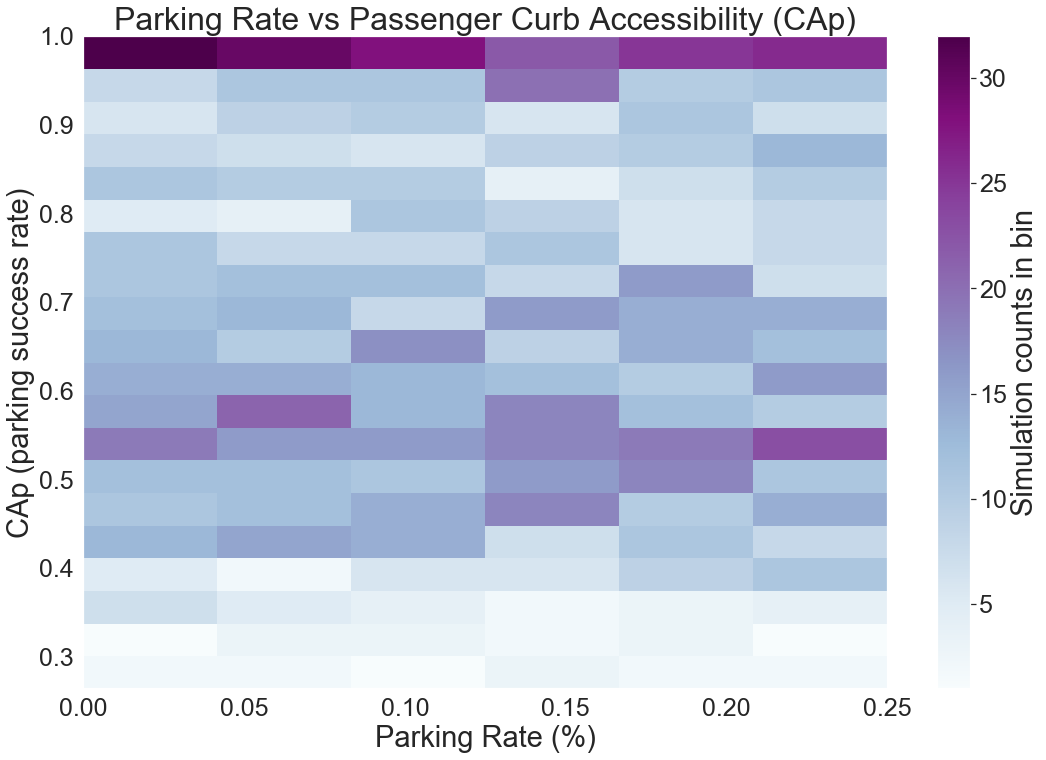

In [147]:
# Blockface 2: Volume vs CA_P
plot2 = plt.hist2d(x2, y6, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('Simulation counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('CAp (parking success rate)')
plt.title('Parking Rate vs Passenger Curb Accessibility (CAp)', fontsize=32)

#### Parking Rate vs CPI_Goods 

Text(0.5, 1.0, 'Parking Rate vs Goods Curb Productivity Index (CPIg)')

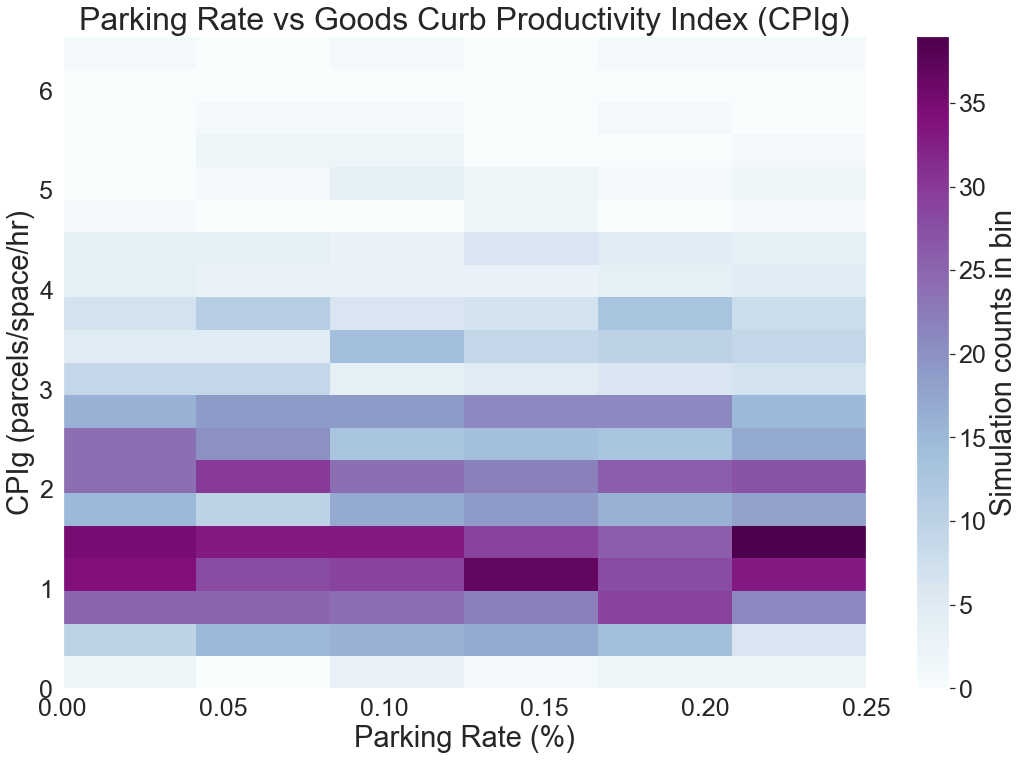

In [148]:
# Blockface 2: Volume vs CPI_G
plot2 = plt.hist2d(x2, y4, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('Simulation counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPIg (parcels/space/hr)')
plt.title('Parking Rate vs Goods Curb Productivity Index (CPIg)', fontsize=32)

#### Parking Rate vs CA_Goods

Text(0.5, 1.0, 'Parking Rate vs Goods Curb Accessibility (CAg)')

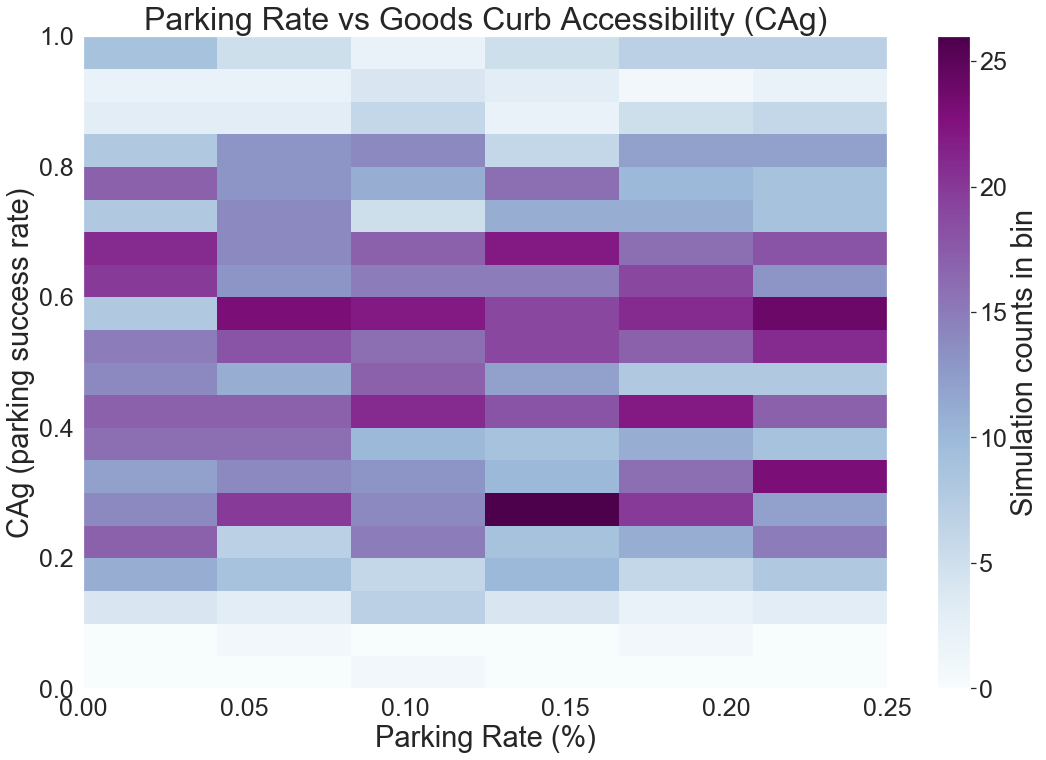

In [149]:
# Blockface 2: Volume vs CA_G
plot2 = plt.hist2d(x2, y8, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('Simulation counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('CAg (parking success rate)')
plt.title('Parking Rate vs Goods Curb Accessibility (CAg)', fontsize=32)

#### Parking Rate vs Emissions

In [ ]:
# Blockface 2: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2, Ey2, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('2D Histogram of Parking Rate vs Emissions')

### Sensitivity Analysis - Blockface 1 By Parking Rate

#### Parking Rate vs CPI_Passengers

In [ ]:
# Blockface 1: Volume vs CPI_P
plot2 = plt.hist2d(x2, y1, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Passengers (pax/space/hr)')
plt.title('2D Histogram of Parking Rate vs CPI_P')

#### Parking Rate vs CA_Passengers

In [ ]:
# Blockface 1: Volume vs CA_P
plot2 = plt.hist2d(x2, y5, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Passengers')
plt.title('2D Histogram of Parking Rate vs CA_P')

#### Parking Rate vs CPI_Goods 

In [ ]:
# Blockface 1: Volume vs CPI_G
plot2 = plt.hist2d(x2, y3, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods (goods/space/hr)')
plt.title('2D Histogram of Parking Rate vs CPI_G')

#### Parking Rate vs CA_Goods

In [ ]:
# Blockface 1: Volume vs CA_G
plot2 = plt.hist2d(x2, y7, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods')
plt.title('2D Histogram of Parking Rate vs CA_G')

#### Parking Rate vs Emissions

In [ ]:
# Blockface 1: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2, Ey1, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('2D Histogram of Parking Rate vs Emissions')

### Heatmaps of Parking Rate by Vehicle Volume

#### Volume = 50 Veh/hr

Text(0.5, 1.0, 'BF1: Parking Rate vs Pax Curb Productivity @ 72vph')

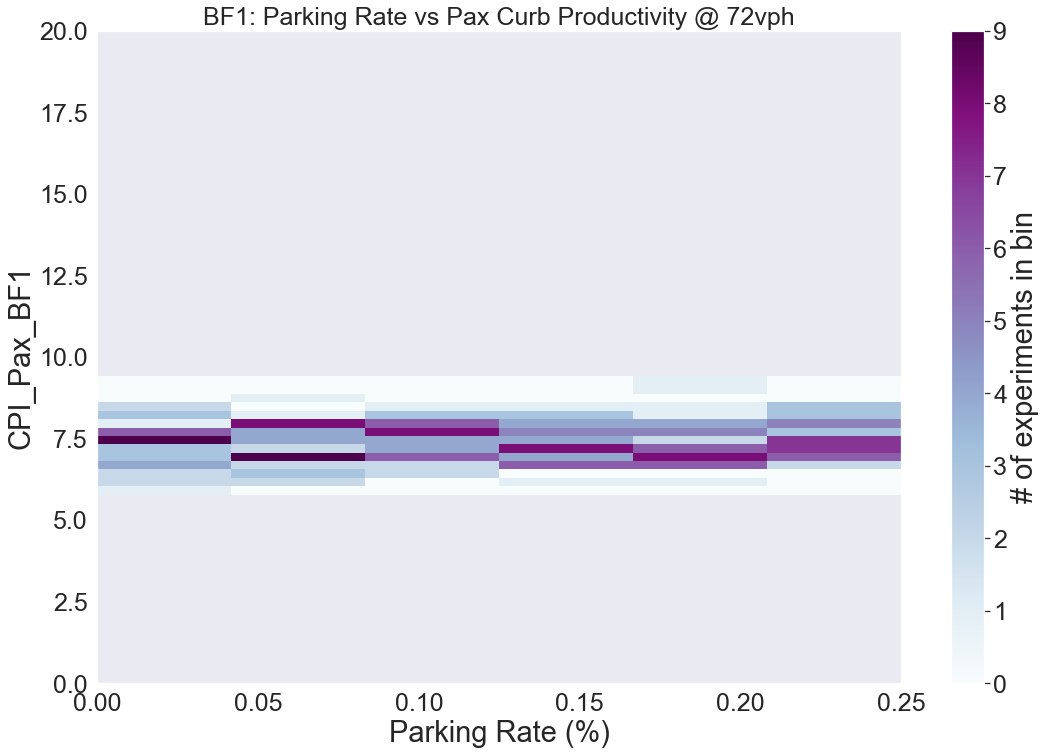

In [151]:
# Blockface 1: CPI_Passengers
plot1 = plt.hist2d(x2_1, y1_1, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Productivity @ 72vph')

In [ ]:
# Blockface 2: CPI_Passengers
plot1 = plt.hist2d(x2_1, y2_1, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Productivity @ 71vph')

In [ ]:
# Blockface 1: CA_Passengers
plot1 = plt.hist2d(x2_1, y5_1, bins=[6,15], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Accessibility @ 72vph')

In [ ]:
# Blockface 2: CA_Passengers
plot1 = plt.hist2d(x2_1, y6_1, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Accessibility @ 71vph')

In [ ]:
# Blockface 1: CPI_Goods
plot1 = plt.hist2d(x2_1, y3_1, bins=[6,20], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Productivity @ 72vph')

In [ ]:
# Blockface 2: CPI_Goods
plot1 = plt.hist2d(x2_1, y4_1, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Productivity @ 71vph')

In [ ]:
# Blockface 1: CA_Goods
plot1 = plt.hist2d(x2_1, y7_1, bins=[6,18], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Accessibility @ 72vph')

In [ ]:
# Blockface 2: CA_Goods
plot1 = plt.hist2d(x2_1, y8_1, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Accessibility @ 71vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Emissions @ 72vph')

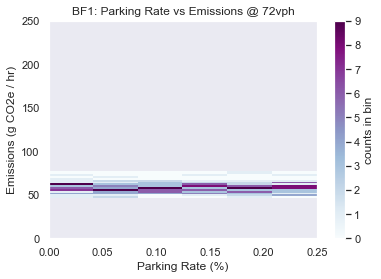

In [72]:
# Blockface 1: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_1, Ey1_1, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Emissions @ 72vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Passenger Veh Emissions @ 72vph')

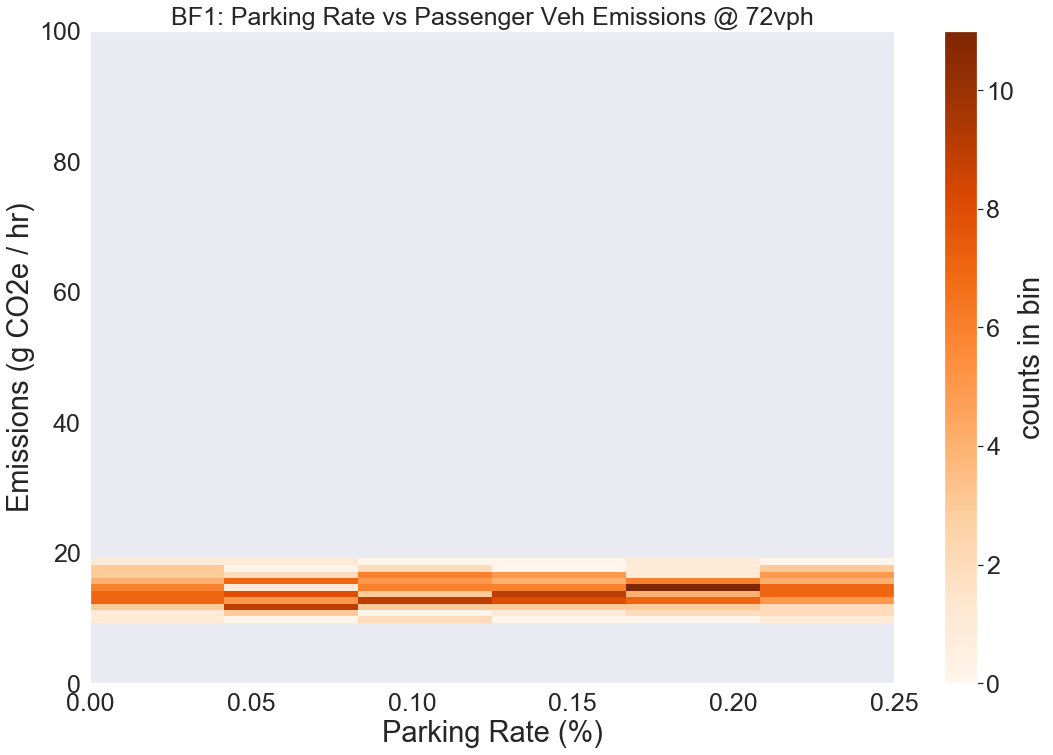

In [150]:
# Blockface 1: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_1, Ey3_1, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Passenger Veh Emissions @ 72vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs TNC Emissions @ 72vph')

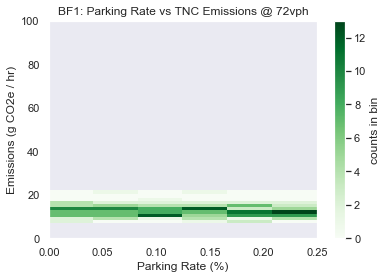

In [74]:
# Blockface 1: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_1, Ey5_1, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs TNC Emissions @ 72vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Goods Veh Emissions @ 72vph')

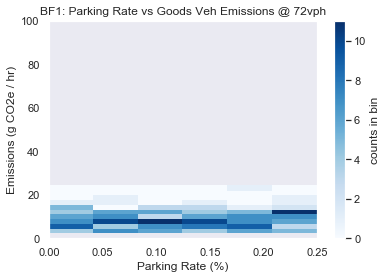

In [75]:
# Blockface 1: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_1, Ey6_1, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Goods Veh Emissions @ 72vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Bus Emissions @ 72vph')

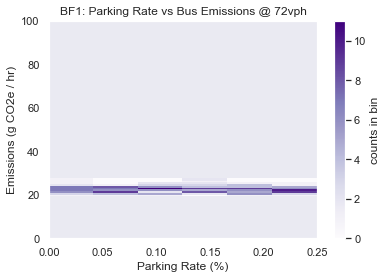

In [76]:
# Blockface 1: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_1, Ey4_1, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Bus Emissions @ 72vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Emissions @ 71vph')

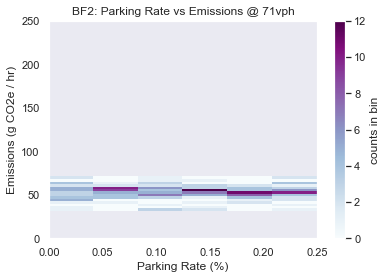

In [77]:
# Blockface 2: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_1, Ey2_1, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Emissions @ 71vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Passenger Veh Emissions @ 71vph')

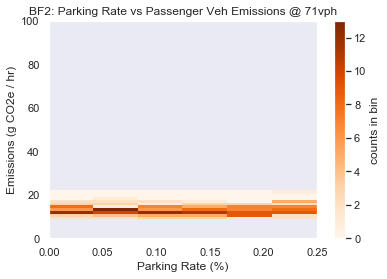

In [78]:
# Blockface 2: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_1, Ey7_1, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Passenger Veh Emissions @ 71vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs TNC Emissions @ 71vph')

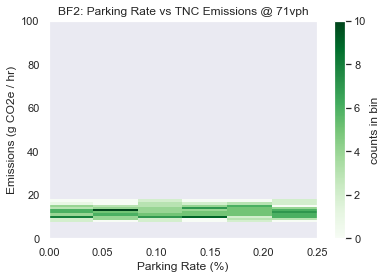

In [79]:
# Blockface 2: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_1, Ey9_1, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs TNC Emissions @ 71vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Goods Veh Emissions @ 71vph')

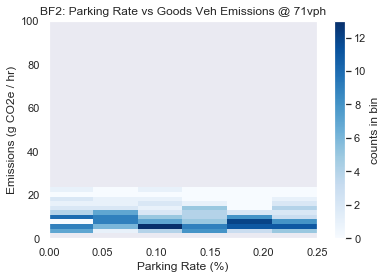

In [80]:
# Blockface 2: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_1, Ey10_1, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Goods Veh Emissions @ 71vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Bus Emissions @ 71vph')

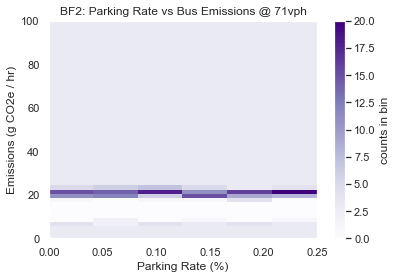

In [81]:
# Blockface 2: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_1, Ey8_1, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Bus Emissions @ 71vph')

#### Volume = 100 Veh/hr

In [ ]:
# Blockface 1: CPI_Passengers
plot1 = plt.hist2d(x2_2, y1_2, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Productivity @ 141vph')

In [ ]:
# Blockface 2: CPI_Passengers
plot1 = plt.hist2d(x2_2, y2_2, bins=[6,17], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Productivity @ 136vph')

In [4]:
# Blockface 1: CA_Passengers
plot1 = plt.hist2d(x2_2, y5_2, bins=[6,10], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Accessibility @ 141vph')

NameError: name 'x2_2' is not defined

In [ ]:
# Blockface 2: CA_Passengers
plot1 = plt.hist2d(x2_2, y6_2, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Accessibility @ 136vph')

In [ ]:
# Blockface 1: CPI_Goods
plot1 = plt.hist2d(x2_2, y3_2, bins=[6,15], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Productivity @ 141vph')

In [ ]:
# Blockface 2: CPI_Goods
plot1 = plt.hist2d(x2_2, y4_2, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Productivity @ 136vph')

In [ ]:
# Blockface 1: CA_Goods
plot1 = plt.hist2d(x2_2, y7_2, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Accessibility @ 141vph')

In [ ]:
# Blockface 2: CA_Goods
plot1 = plt.hist2d(x2_2, y8_2, bins=[6,10], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Accessibility @ 136vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Emissions @ 141vph')

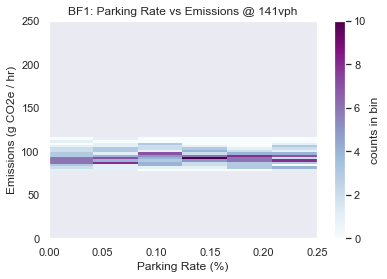

In [82]:
# Blockface 1: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_2, Ey1_2, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Emissions @ 141vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Passenger Veh Emissions @ 141vph')

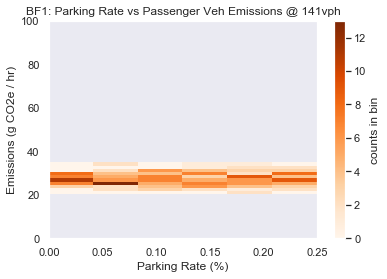

In [83]:
# Blockface 1: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_2, Ey3_2, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Passenger Veh Emissions @ 141vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs TNC Emissions @ 141vph')

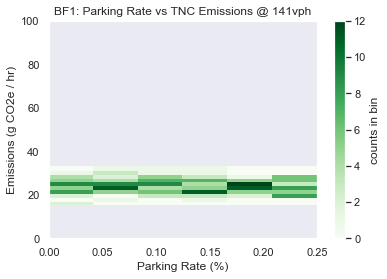

In [84]:
# Blockface 1: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_2, Ey5_2, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs TNC Emissions @ 141vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Goods Veh Emissions @ 141vph')

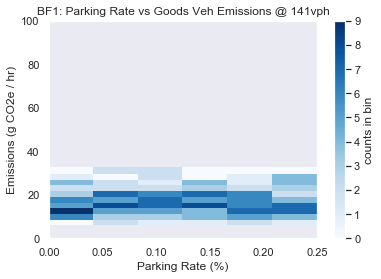

In [85]:
# Blockface 1: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_2, Ey6_2, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Goods Veh Emissions @ 141vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Bus Emissions @ 141vph')

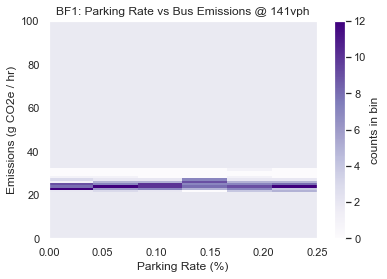

In [86]:
# Blockface 1: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_2, Ey4_2, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Bus Emissions @ 141vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Emissions @ 136vph')

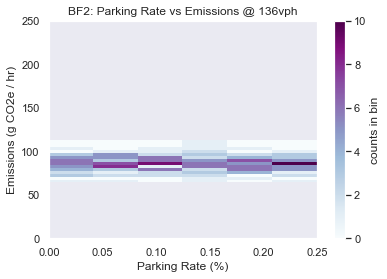

In [87]:
# Blockface 2: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_2, Ey2_2, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Emissions @ 136vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Passenger Veh Emissions @ 136vph')

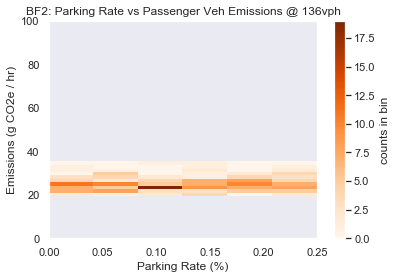

In [88]:
# Blockface 2: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_2, Ey7_2, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Passenger Veh Emissions @ 136vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs TNC Emissions @ 136vph')

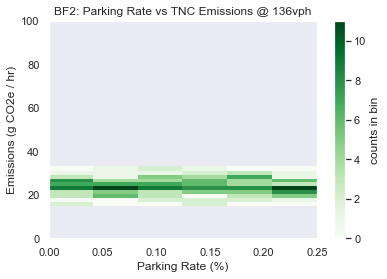

In [89]:
# Blockface 2: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_2, Ey9_2, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs TNC Emissions @ 136vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Goods Veh Emissions @ 136vph')

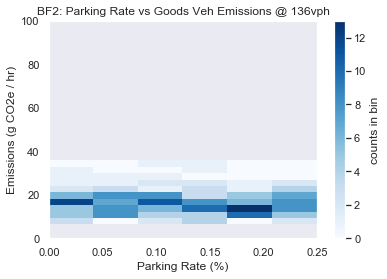

In [90]:
# Blockface 2: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_2, Ey10_2, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Goods Veh Emissions @ 136vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Bus Emissions @ 136vph')

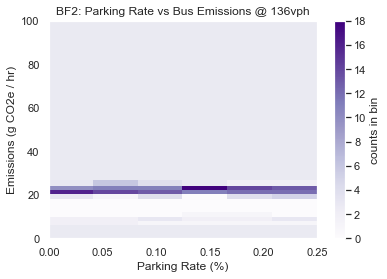

In [91]:
# Blockface 2: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_2, Ey8_2, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Bus Emissions @ 136vph')

#### Volume = 150 Veh/hr

In [ ]:
# Blockface 1: CPI_Passengers
plot1 = plt.hist2d(x2_3, y1_3, bins=[6,13], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Productivity @ 208vph')

In [ ]:
# Blockface 2: CPI_Passengers
plot1 = plt.hist2d(x2_3, y2_3, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Productivity @ 203vph')

In [ ]:
# Blockface 1: CA_Passengers
plot1 = plt.hist2d(x2_3, y5_3, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Accessibility @ 208vph')

In [ ]:
# Blockface 2: CA_Passengers
plot1 = plt.hist2d(x2_3, y6_3, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Accessibility @ 203vph')

In [ ]:
# Blockface 1: CPI_Goods
plot1 = plt.hist2d(x2_3, y3_3, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Productivity @ 208vph')

In [ ]:
# Blockface 2: CPI_Goods
plot1 = plt.hist2d(x2_3, y4_3, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Productivity @ 203vph')

In [ ]:
# Blockface 1: CA_Goods
plot1 = plt.hist2d(x2_3, y7_3, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Accessibility @ 208vph')

In [ ]:
# Blockface 2: CA_Goods
plot1 = plt.hist2d(x2_3, y7_3, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Accessibility @ 203vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Emissions @ 208vph')

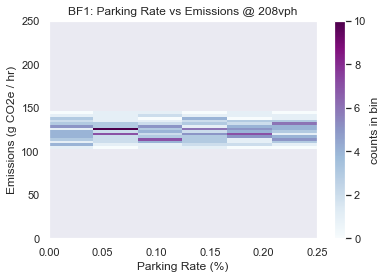

In [92]:
# Blockface 1: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_3, Ey1_3, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Emissions @ 208vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Passenger Veh Emissions @ 208vph')

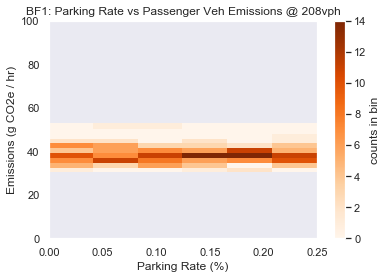

In [93]:
# Blockface 1: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_3, Ey3_3, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Passenger Veh Emissions @ 208vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs TNC Emissions @ 208vph')

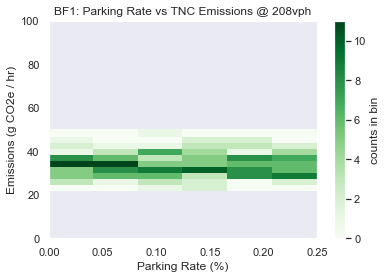

In [94]:
# Blockface 1: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_3, Ey5_3, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs TNC Emissions @ 208vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Goods Veh Emissions @ 208vph')

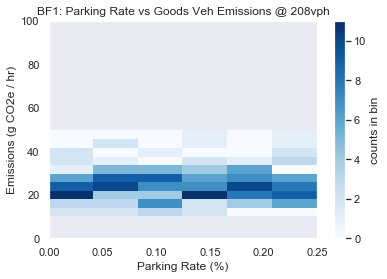

In [95]:
# Blockface 1: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_3, Ey6_3, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Goods Veh Emissions @ 208vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Bus Emissions @ 208vph')

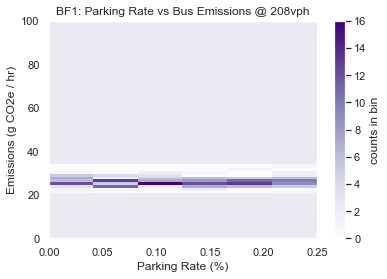

In [96]:
# Blockface 1: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_3, Ey4_3, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Bus Emissions @ 208vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Emissions @ 203vph')

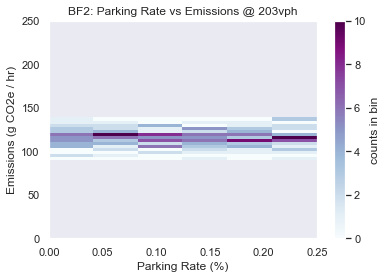

In [97]:
# Blockface 2: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_3, Ey2_3, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Emissions @ 203vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Passenger Veh Emissions @ 203vph')

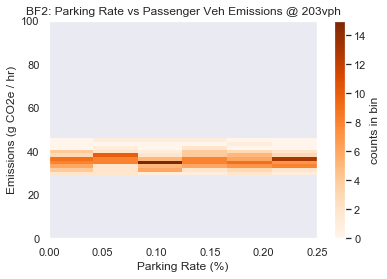

In [98]:
# Blockface 2: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_3, Ey7_3, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Passenger Veh Emissions @ 203vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs TNC Emissions @ 203vph')

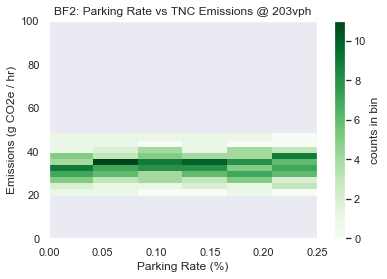

In [99]:
# Blockface 2: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_3, Ey9_3, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs TNC Emissions @ 203vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Goods Veh Emissions @ 203vph')

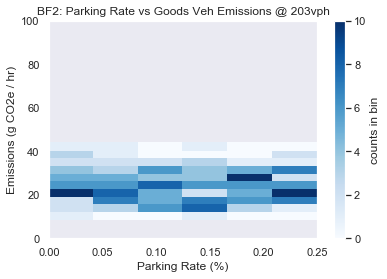

In [100]:
# Blockface 2: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_3, Ey10_3, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Goods Veh Emissions @ 203vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Bus Emissions @ 203vph')

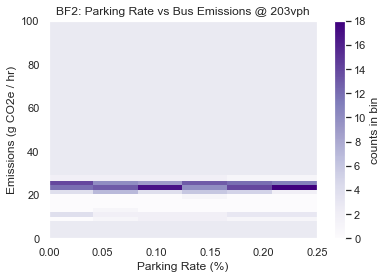

In [101]:
# Blockface 2: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_3, Ey8_3, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Bus Emissions @ 203vph')

#### Volume = 200 Veh/hr

In [ ]:
# Blockface 1: CPI_Passengers
plot1 = plt.hist2d(x2_4, y1_4, bins=[6,17], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Productivity @ 276vph')

In [ ]:
# Blockface 2: CPI_Passengers
plot1 = plt.hist2d(x2_4, y2_4, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Productivity @ 267vph')

In [ ]:
# Blockface 1: CA_Passengers
plot1 = plt.hist2d(x2_4, y5_4, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Accessibility @ 276vph')

In [ ]:
# Blockface 2: CA_Passengers
plot1 = plt.hist2d(x2_4, y6_4, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Accessibility @ 267vph')

In [ ]:
# Blockface 1: CPI_Goods
plot1 = plt.hist2d(x2_4, y3_4, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Productivity @ 276vph')

In [ ]:
# Blockface 2: CPI_Goods
plot1 = plt.hist2d(x2_4, y4_4, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Productivity @ 267vph')

In [ ]:
# Blockface 1: CA_Goods
plot1 = plt.hist2d(x2_4, y7_4, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Accessibility @ 276vph')

In [ ]:
# Blockface 2: CA_Goods
plot1 = plt.hist2d(x2_4, y8_4, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Accessibility @ 267vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Emissions @ 276vph')

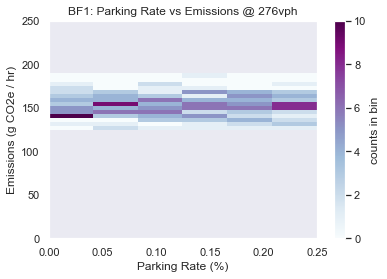

In [102]:
# Blockface 1: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_4, Ey1_4, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Emissions @ 276vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Passenger Veh Emissions @ 276vph')

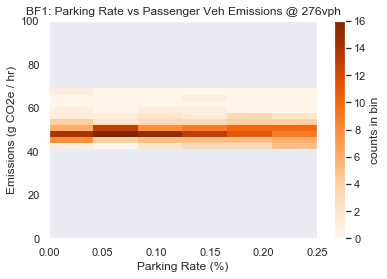

In [103]:
# Blockface 1: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_4, Ey3_4, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Passenger Veh Emissions @ 276vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs TNC Emissions @ 276vph')

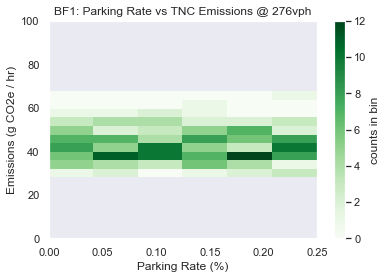

In [104]:
# Blockface 1: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_4, Ey5_4, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs TNC Emissions @ 276vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Goods Veh Emissions @ 276vph')

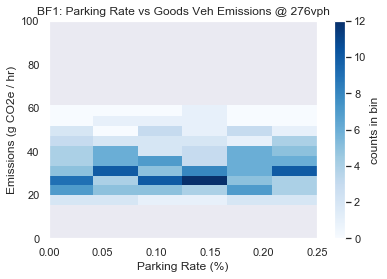

In [105]:
# Blockface 1: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_4, Ey6_4, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Goods Veh Emissions @ 276vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Bus Emissions @ 276vph')

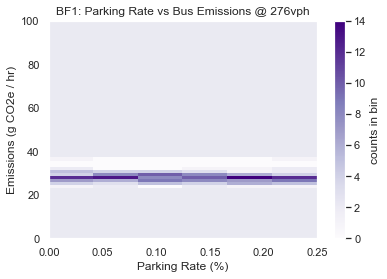

In [106]:
# Blockface 1: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_4, Ey4_4, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Bus Emissions @ 276vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Emissions @ 267vph')

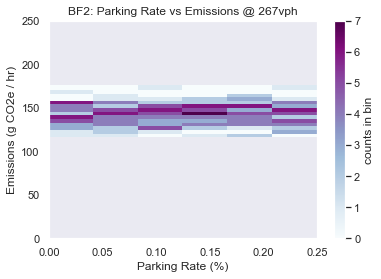

In [107]:
# Blockface 2: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_4, Ey2_4, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Emissions @ 267vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Passenger Veh Emissions @ 267vph')

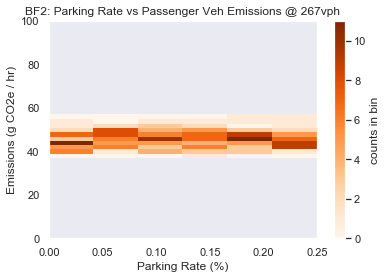

In [108]:
# Blockface 2: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_4, Ey7_4, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Passenger Veh Emissions @ 267vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs TNC Emissions @ 267vph')

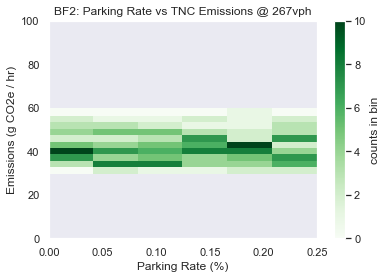

In [109]:
# Blockface 2: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_4, Ey9_4, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs TNC Emissions @ 267vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Goods Veh Emissions @ 267vph')

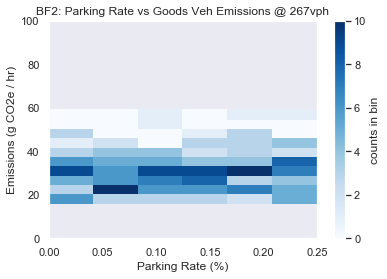

In [110]:
# Blockface 2: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_4, Ey10_4, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Goods Veh Emissions @ 267vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Bus Emissions @ 267vph')

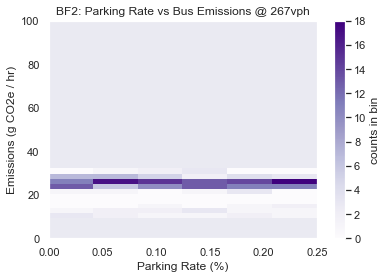

In [111]:
# Blockface 2: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_4, Ey8_4, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Bus Emissions @ 267vph')

#### Volume = 250 Veh/hr

In [ ]:
# Blockface 1: CPI_Passengers
plot1 = plt.hist2d(x2_5, y1_5, bins=[6,17], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Productivity @ 344vph')

In [ ]:
# Blockface 2: CPI_Passengers
plot1 = plt.hist2d(x2_5, y2_5, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Productivity @ 333vph')

In [ ]:
# Blockface 1: CA_Passengers
plot1 = plt.hist2d(x2_5, y5_5, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Accessibility @ 344vph')

In [ ]:
# Blockface 2: CA_Passengers
plot1 = plt.hist2d(x2_5, y6_5, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Accessibility @ 333vph')

In [ ]:
# Blockface 1: CPI_Goods
plot1 = plt.hist2d(x2_5, y3_5, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Productivity @ 344vph')

In [ ]:
# Blockface 2: CPI_Goods
plot1 = plt.hist2d(x2_5, y4_5, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Productivity @ 333vph')

In [ ]:
# Blockface 1: CA_Goods
plot1 = plt.hist2d(x2_5, y7_5, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Accessibility @ 344vph')

In [ ]:
# Blockface 2: CA_Goods
plot1 = plt.hist2d(x2_5, y8_5, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Accessibility @ 333vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Emissions @ 344vph')

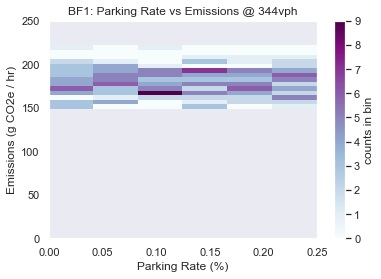

In [112]:
# Blockface 1: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_5, Ey1_5, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Emissions @ 344vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Passenger Veh Emissions @ 344vph')

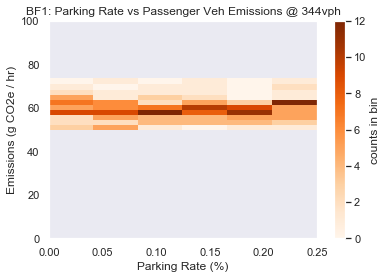

In [113]:
# Blockface 1: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_5, Ey3_5, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Passenger Veh Emissions @ 344vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs TNC Emissions @ 344vph')

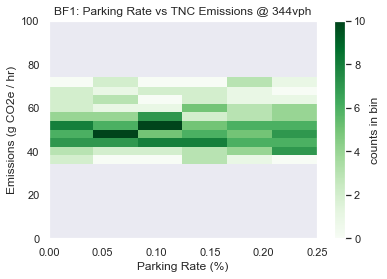

In [114]:
# Blockface 1: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_5, Ey5_5, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs TNC Emissions @ 344vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Goods Veh Emissions @ 344vph')

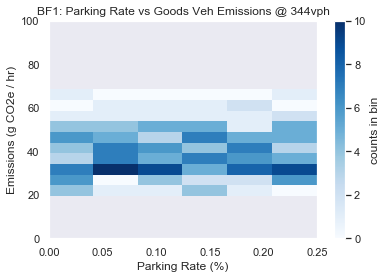

In [115]:
# Blockface 1: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_5, Ey6_5, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Goods Veh Emissions @ 344vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Bus Emissions @ 344vph')

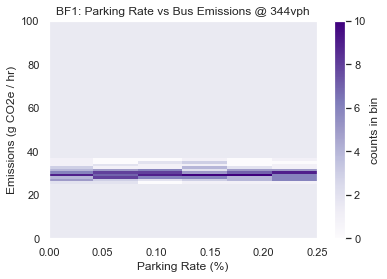

In [116]:
# Blockface 1: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_5, Ey4_5, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Bus Emissions @ 344vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Emissions @ 333vph')

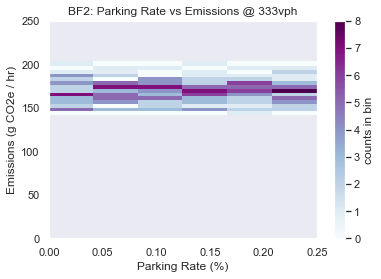

In [117]:
# Blockface 2: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_5, Ey2_5, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Emissions @ 333vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Passenger Veh Emissions @ 333vph')

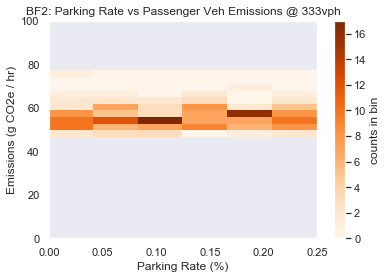

In [118]:
# Blockface 2: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_5, Ey7_5, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Passenger Veh Emissions @ 333vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs TNC Emissions @ 333vph')

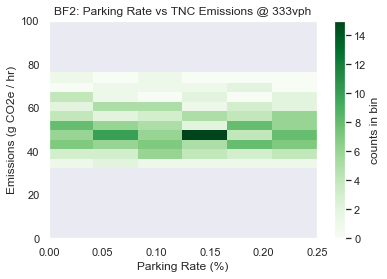

In [119]:
# Blockface 2: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_5, Ey9_5, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs TNC Emissions @ 333vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Goods Veh Emissions @ 333vph')

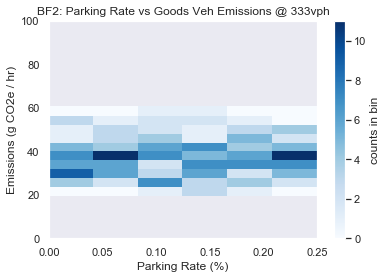

In [120]:
# Blockface 2: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_5, Ey10_5, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Goods Veh Emissions @ 333vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Bus Emissions @ 333vph')

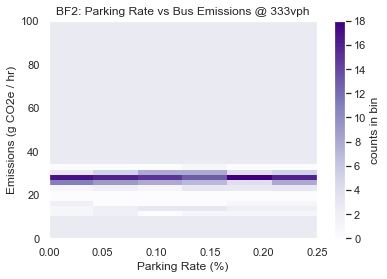

In [121]:
# Blockface 2: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_5, Ey8_5, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Bus Emissions @ 333vph')

#### Volume = 300 Veh/hr

In [ ]:
# Blockface 1: CPI_Passengers
plot1 = plt.hist2d(x2_6, y1_6, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Productivity @ 411vph')

In [ ]:
# Blockface 2: CPI_Passengers
plot1 = plt.hist2d(x2_6, y2_6, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,20])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Productivity @ 396vph')

In [ ]:
# Blockface 1: CA_Passengers
plot1 = plt.hist2d(x2_6, y5_6, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF1')
plt.title('BF1: Parking Rate vs Pax Curb Accessibility @ 411vph')

In [ ]:
# Blockface 2: CA_Passengers
plot1 = plt.hist2d(x2_6, y6_6, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Pax_BF2')
plt.title('BF2: Parking Rate vs Pax Curb Accessibility @ 396vph')

In [ ]:
# Blockface 1: CPI_Goods
plot1 = plt.hist2d(x2_6, y3_6, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Productivity @ 411vph')

In [ ]:
# Blockface 2: CPI_Goods
plot1 = plt.hist2d(x2_6, y4_6, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,7])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CPI_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Productivity @ 396vph')

In [ ]:
# Blockface 1: CA_Goods
plot1 = plt.hist2d(x2_6, y7_6, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF1')
plt.title('BF1: Parking Rate vs Goods Curb Accessibility @ 411vph')

In [ ]:
# Blockface 2: CA_Goods
plot1 = plt.hist2d(x2_6, y8_6, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
cb.set_label('# of experiments in bin')
#plt.xlim([0,400])
plt.ylim([0,1])
plt.xlabel('Parking Rate (%)')
plt.ylabel('CA_Goods_BF2')
plt.title('BF2: Parking Rate vs Goods Curb Accessibility @ 396vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Emissions @ 411vph')

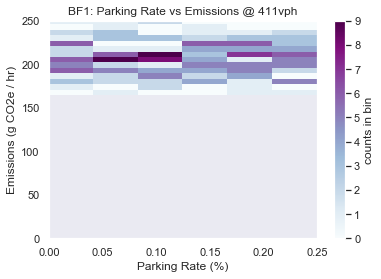

In [122]:
# Blockface 1: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_6, Ey1_6, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Emissions @ 411vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Passenger Veh Emissions @ 411vph')

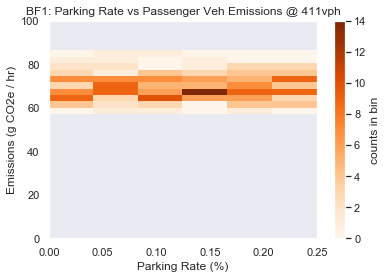

In [123]:
# Blockface 1: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_6, Ey3_6, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Passenger Veh Emissions @ 411vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs TNC Emissions @ 411vph')

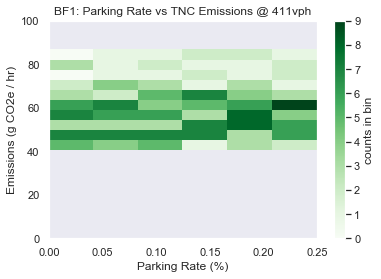

In [124]:
# Blockface 1: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_6, Ey5_6, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs TNC Emissions @ 411vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Goods Veh Emissions @ 411vph')

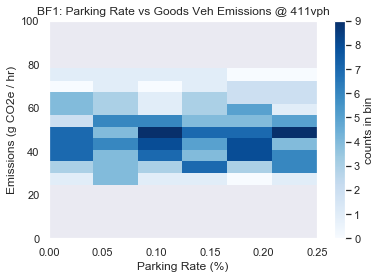

In [125]:
# Blockface 1: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_6, Ey6_6, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Goods Veh Emissions @ 411vph')

Text(0.5, 1.0, 'BF1: Parking Rate vs Bus Emissions @ 411vph')

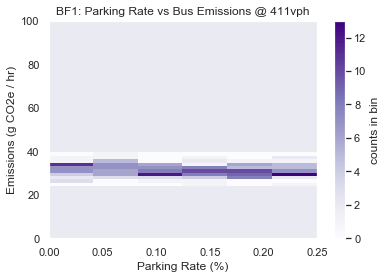

In [126]:
# Blockface 1: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_6, Ey4_6, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF1: Parking Rate vs Bus Emissions @ 411vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Emissions @ 396vph')

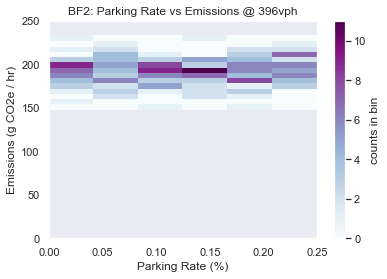

In [127]:
# Blockface 2: Parking Rate vs Total Emissions
plot2 = plt.hist2d(Ex2_6, Ey2_6, bins=[6,14], density=False, cmap=plt.cm.BuPu)
cb = plt.colorbar()
plt.ylim([0,250])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Emissions @ 396vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Passenger Veh Emissions @ 396vph')

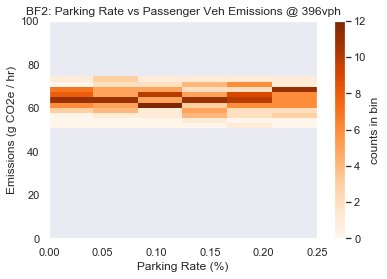

In [128]:
# Blockface 2: Parking Rate vs Pax Veh Emissions (100)
plot2 = plt.hist2d(Ex2_6, Ey7_6, bins=[6,10], density=False, cmap=plt.cm.Oranges)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Passenger Veh Emissions @ 396vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs TNC Emissions @ 396vph')

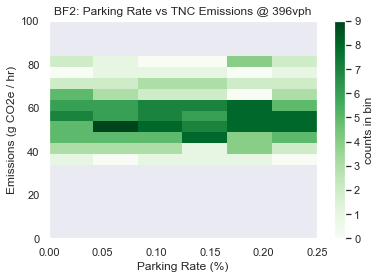

In [129]:
# Blockface 2: Parking Rate vs TNC Emissions (640)
plot2 = plt.hist2d(Ex2_6, Ey9_6, bins=[6,10], density=False, cmap=plt.cm.Greens)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs TNC Emissions @ 396vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Goods Veh Emissions @ 396vph')

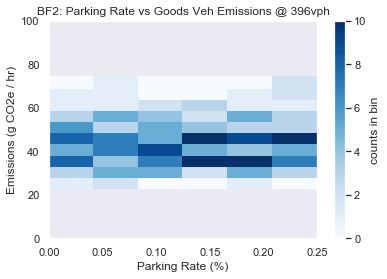

In [130]:
# Blockface 2: Parking Rate vs Comm Veh Emissions (650,200)
plot2 = plt.hist2d(Ex2_6, Ey10_6, bins=[6,10], density=False, cmap=plt.cm.Blues)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Goods Veh Emissions @ 396vph')

Text(0.5, 1.0, 'BF2: Parking Rate vs Bus Emissions @ 396vph')

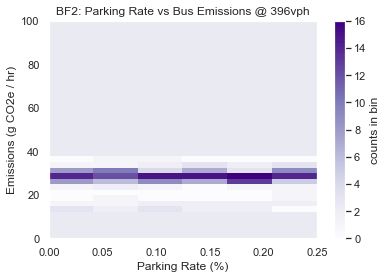

In [131]:
# Blockface 2: Parking Rate vs Bus Emissions (300)
plot2 = plt.hist2d(Ex2_6, Ey8_6, bins=[6,10], density=False, cmap=plt.cm.Purples)
cb = plt.colorbar()
plt.ylim([0,100])
cb.set_label('counts in bin')
plt.xlabel('Parking Rate (%)')
plt.ylabel('Emissions (g CO2e / hr)')
plt.title('BF2: Parking Rate vs Bus Emissions @ 396vph')

## Parking Occupancy by Space Type and Ind. Space

### Scenario 1

In [ ]:
# Create new colunmns to average values for dwell time by vehicle type.
Scen_1["PP_100_Ave_BL1"] = Scen_1[['PL_10_100','PL_11_100','PL_12_100','PL_13_100','PL_14_100','PL_15_100','PL_16_100','PL_17_100','PL_18_100','PL_19_100']].mean(axis=1)
Scen_1["PP_100_Ave_BL2"] = Scen_1[['PL_20_100','PL_21_100','PL_22_100','PL_23_100','PL_24_100','PL_25_100','PL_26_100','PL_27_100','PL_28_100']].mean(axis=1)

Scen_1["PP_640_Ave_BL1"] = Scen_1[['PL_10_640','PL_11_640','PL_12_640','PL_13_640','PL_14_640','PL_15_640','PL_16_640','PL_17_640','PL_18_640','PL_19_640']].mean(axis=1)
Scen_1["PP_640_Ave_BL2"] = Scen_1[['PL_20_640','PL_21_640','PL_22_640','PL_23_640','PL_24_640','PL_25_640','PL_26_640','PL_27_640','PL_28_640']].mean(axis=1)

Scen_1["PP_650_Ave_BL1"] = Scen_1[['PL_10_650','PL_11_650','PL_12_650','PL_13_650','PL_14_650','PL_15_650','PL_16_650','PL_17_650','PL_18_650','PL_19_650']].mean(axis=1)
Scen_1["PP_650_Ave_BL2"] = Scen_1[['PL_20_650','PL_21_650','PL_22_650','PL_23_650','PL_24_650','PL_25_650','PL_26_650','PL_27_650','PL_28_650']].mean(axis=1)

Scen_1

In [ ]:
#Average of all Paid parking spaces - BF_1
n_bins = 10
x1 = Scen_1['PP_650_Ave_BL1']
x2 = Scen_1['PP_100_Ave_BL1']
x3 = Scen_1['PP_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all Paid parking spaces - BF_2
n_bins = 10
x1 = Scen_1['PP_650_Ave_BL2']
x2 = Scen_1['PP_100_Ave_BL2']
x3 = Scen_1['PP_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 10
n_bins = 10
x1 = Scen_1['PL_10_650']
x2 = Scen_1['PL_10_100']
x3 = Scen_1['PL_10_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 10; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 11
n_bins = 10
x1 = Scen_1['PL_11_650']
x2 = Scen_1['PL_11_100']
x3 = Scen_1['PL_11_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 11; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 12
n_bins = 10
x1 = Scen_1['PL_12_650']
x2 = Scen_1['PL_12_100']
x3 = Scen_1['PL_12_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 12; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 13
n_bins = 10
x1 = Scen_1['PL_13_650']
x2 = Scen_1['PL_13_100']
x3 = Scen_1['PL_13_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 13; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 14
n_bins = 10
x1 = Scen_1['PL_14_650']
x2 = Scen_1['PL_14_100']
x3 = Scen_1['PL_14_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 14; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 15
n_bins = 10
x1 = Scen_1['PL_15_650']
x2 = Scen_1['PL_15_100']
x3 = Scen_1['PL_15_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 15; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 16
n_bins = 10
x1 = Scen_1['PL_16_650']
x2 = Scen_1['PL_16_100']
x3 = Scen_1['PL_16_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 16; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 17
n_bins = 10
x1 = Scen_1['PL_17_650']
x2 = Scen_1['PL_17_100']
x3 = Scen_1['PL_17_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 17; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 18
n_bins = 10
x1 = Scen_1['PL_18_650']
x2 = Scen_1['PL_18_100']
x3 = Scen_1['PL_18_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 18; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 19
n_bins = 10
x1 = Scen_1['PL_19_650']
x2 = Scen_1['PL_19_100']
x3 = Scen_1['PL_19_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 19; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 20
n_bins = 10
x1 = Scen_1['PL_20_650']
x2 = Scen_1['PL_20_100']
x3 = Scen_1['PL_20_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 20; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 21
n_bins = 10
x1 = Scen_1['PL_21_650']
x2 = Scen_1['PL_21_100']
x3 = Scen_1['PL_21_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 21; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 22
n_bins = 10
x1 = Scen_1['PL_22_650']
x2 = Scen_1['PL_22_100']
x3 = Scen_1['PL_22_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 22; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 23
n_bins = 10
x1 = Scen_1['PL_23_650']
x2 = Scen_1['PL_23_100']
x3 = Scen_1['PL_23_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 23; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 24
n_bins = 10
x1 = Scen_1['PL_24_650']
x2 = Scen_1['PL_24_100']
x3 = Scen_1['PL_24_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 24; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 25
n_bins = 10
x1 = Scen_1['PL_25_650']
x2 = Scen_1['PL_25_100']
x3 = Scen_1['PL_25_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 25; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 26
n_bins = 10
x1 = Scen_1['PL_26_650']
x2 = Scen_1['PL_26_100']
x3 = Scen_1['PL_26_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 26; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 27
n_bins = 10
x1 = Scen_1['PL_27_650']
x2 = Scen_1['PL_27_100']
x3 = Scen_1['PL_27_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 27; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 28
n_bins = 10
x1 = Scen_1['PL_28_650']
x2 = Scen_1['PL_28_100']
x3 = Scen_1['PL_28_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 28; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

## Scenario 2

In [ ]:
# Create new colunmns to average values for dwell time by vehicle type.
Scen_2["PP_100_Ave_BL1"] = Scen_2[['PL_10_100','PL_11_100','PL_12_100','PL_13_100','PL_14_100','PL_16_100','PL_17_100','PL_18_100','PL_19_100']].mean(axis=1)
Scen_2["PP_100_Ave_BL2"] = Scen_2[['PL_20_100','PL_21_100','PL_22_100','PL_23_100','PL_24_100','PL_26_100','PL_27_100','PL_28_100']].mean(axis=1)

Scen_2["PP_640_Ave_BL1"] = Scen_2[['PL_10_640','PL_11_640','PL_12_640','PL_13_640','PL_14_640','PL_16_640','PL_17_640','PL_18_640','PL_19_640']].mean(axis=1)
Scen_2["PP_640_Ave_BL2"] = Scen_2[['PL_20_640','PL_21_640','PL_22_640','PL_23_640','PL_24_640','PL_26_640','PL_27_640','PL_28_640']].mean(axis=1)

Scen_2["PP_650_Ave_BL1"] = Scen_2[['PL_10_650','PL_11_650','PL_12_650','PL_13_650','PL_14_650','PL_16_650','PL_17_650','PL_18_650','PL_19_650']].mean(axis=1)
Scen_2["PP_650_Ave_BL2"] = Scen_2[['PL_20_650','PL_21_650','PL_22_650','PL_23_650','PL_24_650','PL_26_650','PL_27_650','PL_28_650']].mean(axis=1)

#PLZ
Scen_2["PLZ_100_Ave_BL1"] = Scen_2[['PL_15_100']].mean(axis=1)
Scen_2["PLZ_100_Ave_BL2"] = Scen_2[['PL_25_100']].mean(axis=1)

Scen_2["PLZ_640_Ave_BL1"] = Scen_2[['PL_15_640']].mean(axis=1)
Scen_2["PLZ_640_Ave_BL2"] = Scen_2[['PL_25_640']].mean(axis=1)

Scen_2["PLZ_650_Ave_BL1"] = Scen_2[['PL_15_650']].mean(axis=1)
Scen_2["PLZ_650_Ave_BL2"] = Scen_2[['PL_25_650']].mean(axis=1)


In [ ]:
#Average of all Paid parking spaces - BF_1
n_bins = 10
x1 = Scen_2['PP_650_Ave_BL1']
x2 = Scen_2['PP_100_Ave_BL1']
x3 = Scen_2['PP_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all Paid parking spaces - BF_2
n_bins = 10
x1 = Scen_2['PP_650_Ave_BL2']
x2 = Scen_2['PP_100_Ave_BL2']
x3 = Scen_2['PP_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_1
n_bins = 10
x1 = Scen_2['PLZ_650_Ave_BL1']
x2 = Scen_2['PLZ_100_Ave_BL1']
x3 = Scen_2['PLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_2
n_bins = 10
x1 = Scen_2['PLZ_650_Ave_BL2']
x2 = Scen_2['PLZ_100_Ave_BL2']
x3 = Scen_2['PLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 10
n_bins = 10
x1 = Scen_2['PL_10_650']
x2 = Scen_2['PL_10_100']
x3 = Scen_2['PL_10_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 10; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 11
n_bins = 10
x1 = Scen_2['PL_11_650']
x2 = Scen_2['PL_11_100']
x3 = Scen_2['PL_11_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 11; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 12
n_bins = 10
x1 = Scen_2['PL_12_650']
x2 = Scen_2['PL_12_100']
x3 = Scen_2['PL_12_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 12; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 13
n_bins = 10
x1 = Scen_2['PL_13_650']
x2 = Scen_2['PL_13_100']
x3 = Scen_2['PL_13_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 13; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 14
n_bins = 10
x1 = Scen_2['PL_14_650']
x2 = Scen_2['PL_14_100']
x3 = Scen_2['PL_14_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 14; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 15
n_bins = 10
x1 = Scen_2['PL_15_650']
x2 = Scen_2['PL_15_100']
x3 = Scen_2['PL_15_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 15; Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 16
n_bins = 10
x1 = Scen_2['PL_16_650']
x2 = Scen_2['PL_16_100']
x3 = Scen_2['PL_16_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 16; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 17
n_bins = 10
x1 = Scen_2['PL_17_650']
x2 = Scen_2['PL_17_100']
x3 = Scen_2['PL_17_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 17; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 18
n_bins = 10
x1 = Scen_2['PL_18_650']
x2 = Scen_2['PL_18_100']
x3 = Scen_2['PL_18_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 18; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 19
n_bins = 10
x1 = Scen_2['PL_19_650']
x2 = Scen_2['PL_19_100']
x3 = Scen_2['PL_19_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 19; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 20
n_bins = 10
x1 = Scen_2['PL_20_650']
x2 = Scen_2['PL_20_100']
x3 = Scen_2['PL_20_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 20; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 21
n_bins = 10
x1 = Scen_2['PL_21_650']
x2 = Scen_2['PL_21_100']
x3 = Scen_2['PL_21_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 21; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 22
n_bins = 10
x1 = Scen_2['PL_22_650']
x2 = Scen_2['PL_22_100']
x3 = Scen_2['PL_22_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 22; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 23
n_bins = 10
x1 = Scen_2['PL_23_650']
x2 = Scen_2['PL_23_100']
x3 = Scen_2['PL_23_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 23; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 24
n_bins = 10
x1 = Scen_2['PL_24_650']
x2 = Scen_2['PL_24_100']
x3 = Scen_2['PL_24_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 24; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 25
n_bins = 10
x1 = Scen_2['PL_25_650']
x2 = Scen_2['PL_25_100']
x3 = Scen_2['PL_25_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 25; Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 26
n_bins = 10
x1 = Scen_2['PL_26_650']
x2 = Scen_2['PL_26_100']
x3 = Scen_2['PL_26_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 26; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 27
n_bins = 10
x1 = Scen_2['PL_27_650']
x2 = Scen_2['PL_27_100']
x3 = Scen_2['PL_27_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 27; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 28
n_bins = 10
x1 = Scen_2['PL_28_650']
x2 = Scen_2['PL_28_100']
x3 = Scen_2['PL_28_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 28; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

### Scenario 3

In [ ]:
# Create new colunmns to average values for dwell time by vehicle type.
#PP
Scen_3["PP_100_Ave_BL1"] = Scen_3[['PL_10_100','PL_11_100','PL_12_100','PL_13_100','PL_14_100','PL_15_100','PL_16_100','PL_17_100']].mean(axis=1)
Scen_3["PP_100_Ave_BL2"] = Scen_3[['PL_21_100','PL_22_100','PL_23_100','PL_24_100','PL_25_100','PL_26_100','PL_27_100','PL_28_100']].mean(axis=1)

Scen_3["PP_640_Ave_BL1"] = Scen_3[['PL_10_640','PL_11_640','PL_12_640','PL_13_640','PL_14_640','PL_15_640','PL_16_640','PL_17_640']].mean(axis=1)
Scen_3["PP_640_Ave_BL2"] = Scen_3[['PL_21_640','PL_22_640','PL_23_640','PL_24_640','PL_25_640','PL_26_640','PL_27_640','PL_28_640']].mean(axis=1)

Scen_3["PP_650_Ave_BL1"] = Scen_3[['PL_10_650','PL_11_650','PL_12_650','PL_13_650','PL_14_650','PL_15_650','PL_16_650','PL_17_650']].mean(axis=1)
Scen_3["PP_650_Ave_BL2"] = Scen_3[['PL_21_650','PL_22_650','PL_23_650','PL_24_650','PL_24_650','PL_26_650','PL_27_650','PL_28_650']].mean(axis=1)

#CVLZ
Scen_3["CVLZ_100_Ave_BL1"] = Scen_3[['PL_18_100','PL_19_100']].mean(axis=1)
Scen_3["CVLZ_100_Ave_BL2"] = Scen_3[['PL_20_100']].mean(axis=1)

Scen_3["CVLZ_640_Ave_BL1"] = Scen_3[['PL_18_640','PL_19_640']].mean(axis=1)
Scen_3["CVLZ_640_Ave_BL2"] = Scen_3[['PL_20_640',]].mean(axis=1)

Scen_3["CVLZ_650_Ave_BL1"] = Scen_3[['PL_18_650','PL_19_650']].mean(axis=1)
Scen_3["CVLZ_650_Ave_BL2"] = Scen_3[['PL_20_650']].mean(axis=1)


In [ ]:
#Average of all Paid parking spaces - BF_1
n_bins = 10
x1 = Scen_3['PP_650_Ave_BL1']
x2 = Scen_3['PP_100_Ave_BL1']
x3 = Scen_3['PP_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all Paid parking spaces - BF_2
n_bins = 10
x1 = Scen_3['PP_650_Ave_BL2']
x2 = Scen_3['PP_100_Ave_BL2']
x3 = Scen_3['PP_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_1
n_bins = 10
x1 = Scen_3['CVLZ_650_Ave_BL1']
x2 = Scen_3['CVLZ_100_Ave_BL1']
x3 = Scen_3['CVLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_2
n_bins = 10
x1 = Scen_3['CVLZ_650_Ave_BL2']
x2 = Scen_3['CVLZ_100_Ave_BL2']
x3 = Scen_3['CVLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 10
n_bins = 10
x1 = Scen_3['PL_10_650']
x2 = Scen_3['PL_10_100']
x3 = Scen_3['PL_10_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 10; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 11
n_bins = 10
x1 = Scen_3['PL_11_650']
x2 = Scen_3['PL_11_100']
x3 = Scen_3['PL_11_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 11; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 12
n_bins = 10
x1 = Scen_3['PL_12_650']
x2 = Scen_3['PL_12_100']
x3 = Scen_3['PL_12_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 12; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 13
n_bins = 10
x1 = Scen_3['PL_13_650']
x2 = Scen_3['PL_13_100']
x3 = Scen_3['PL_13_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 13; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 14
n_bins = 10
x1 = Scen_3['PL_14_650']
x2 = Scen_3['PL_14_100']
x3 = Scen_3['PL_14_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 14; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 15
n_bins = 10
x1 = Scen_3['PL_15_650']
x2 = Scen_3['PL_15_100']
x3 = Scen_3['PL_15_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 15; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 16
n_bins = 10
x1 = Scen_3['PL_16_650']
x2 = Scen_3['PL_16_100']
x3 = Scen_3['PL_16_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 16; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 17
n_bins = 10
x1 = Scen_3['PL_17_650']
x2 = Scen_3['PL_17_100']
x3 = Scen_3['PL_17_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 17; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 18
n_bins = 10
x1 = Scen_3['PL_18_650']
x2 = Scen_3['PL_18_100']
x3 = Scen_3['PL_18_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 18; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 19
n_bins = 10
x1 = Scen_3['PL_19_650']
x2 = Scen_3['PL_19_100']
x3 = Scen_3['PL_19_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 19; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 20
n_bins = 10
x1 = Scen_3['PL_20_650']
x2 = Scen_3['PL_20_100']
x3 = Scen_3['PL_20_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 20; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 21
n_bins = 10
x1 = Scen_3['PL_21_650']
x2 = Scen_3['PL_21_100']
x3 = Scen_3['PL_21_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 21; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 22
n_bins = 10
x1 = Scen_3['PL_22_650']
x2 = Scen_3['PL_22_100']
x3 = Scen_3['PL_22_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 22; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 23
n_bins = 10
x1 = Scen_3['PL_23_650']
x2 = Scen_3['PL_23_100']
x3 = Scen_3['PL_23_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 23; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 24
n_bins = 10
x1 = Scen_3['PL_24_650']
x2 = Scen_3['PL_24_100']
x3 = Scen_3['PL_24_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 24; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 25
n_bins = 10
x1 = Scen_3['PL_25_650']
x2 = Scen_3['PL_25_100']
x3 = Scen_3['PL_25_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 25; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 26
n_bins = 10
x1 = Scen_3['PL_26_650']
x2 = Scen_3['PL_26_100']
x3 = Scen_3['PL_26_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 26; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 27
n_bins = 10
x1 = Scen_3['PL_27_650']
x2 = Scen_3['PL_27_100']
x3 = Scen_3['PL_27_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 27; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 28
n_bins = 10
x1 = Scen_3['PL_28_650']
x2 = Scen_3['PL_28_100']
x3 = Scen_3['PL_28_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 28; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

### Scenario 4 (which is actually 4a)

In [ ]:
Scen_4["PP_100_Ave_BL1"] = Scen_4[['PL_10_100','PL_11_100','PL_12_100','PL_13_100','PL_14_100','PL_16_100','PL_17_100']].mean(axis=1)
Scen_4["PP_100_Ave_BL2"] = Scen_4[['PL_21_100','PL_22_100','PL_23_100','PL_24_100','PL_26_100','PL_27_100','PL_28_100']].mean(axis=1)

Scen_4["PP_640_Ave_BL1"] = Scen_4[['PL_10_640','PL_11_640','PL_12_640','PL_13_640','PL_14_640','PL_16_640','PL_17_640']].mean(axis=1)
Scen_4["PP_640_Ave_BL2"] = Scen_4[['PL_21_640','PL_22_640','PL_23_640','PL_24_640','PL_26_640','PL_27_640','PL_28_640']].mean(axis=1)

Scen_4["PP_650_Ave_BL1"] = Scen_4[['PL_10_650','PL_11_650','PL_12_650','PL_13_650','PL_14_650','PL_16_650','PL_17_650']].mean(axis=1)
Scen_4["PP_650_Ave_BL2"] = Scen_4[['PL_21_650','PL_22_650','PL_23_650','PL_24_650','PL_26_650','PL_27_650','PL_28_650']].mean(axis=1)

#CVLZ
Scen_4["CVLZ_100_Ave_BL1"] = Scen_4[['PL_18_100','PL_19_100']].mean(axis=1)
Scen_4["CVLZ_100_Ave_BL2"] = Scen_4[['PL_20_100']].mean(axis=1)

Scen_4["CVLZ_640_Ave_BL1"] = Scen_4[['PL_18_640','PL_19_640']].mean(axis=1)
Scen_4["CVLZ_640_Ave_BL2"] = Scen_4[['PL_20_640',]].mean(axis=1)

Scen_4["CVLZ_650_Ave_BL1"] = Scen_4[['PL_18_650','PL_19_650']].mean(axis=1)
Scen_4["CVLZ_650_Ave_BL2"] = Scen_4[['PL_20_650']].mean(axis=1)

#CVLZ
Scen_4["PLZ_100_Ave_BL1"] = Scen_4[['PL_15_100']].mean(axis=1)
Scen_4["PLZ_100_Ave_BL2"] = Scen_4[['PL_25_100']].mean(axis=1)

Scen_4["PLZ_640_Ave_BL1"] = Scen_4[['PL_15_640']].mean(axis=1)
Scen_4["PLZ_640_Ave_BL2"] = Scen_4[['PL_25_640',]].mean(axis=1)

Scen_4["PLZ_650_Ave_BL1"] = Scen_4[['PL_15_650']].mean(axis=1)
Scen_4["PLZ_650_Ave_BL2"] = Scen_4[['PL_25_650']].mean(axis=1)

In [ ]:
#Average of all Paid parking spaces - BF_1
n_bins = 10
x1 = Scen_4['PP_650_Ave_BL1']
x2 = Scen_4['PP_100_Ave_BL1']
x3 = Scen_4['PP_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all Paid parking spaces - BF_2
n_bins = 10
x1 = Scen_4['PP_650_Ave_BL2']
x2 = Scen_4['PP_100_Ave_BL2']
x3 = Scen_4['PP_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_1
n_bins = 10
x1 = Scen_4['CVLZ_650_Ave_BL1']
x2 = Scen_4['CVLZ_100_Ave_BL1']
x3 = Scen_4['CVLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_2
n_bins = 10
x1 = Scen_4['CVLZ_650_Ave_BL2']
x2 = Scen_4['CVLZ_100_Ave_BL2']
x3 = Scen_4['CVLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_1
n_bins = 10
x1 = Scen_4['PLZ_650_Ave_BL1']
x2 = Scen_4['PLZ_100_Ave_BL1']
x3 = Scen_4['PLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=10, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_2
n_bins = 10
x1 = Scen_4['PLZ_650_Ave_BL2']
x2 = Scen_4['PLZ_100_Ave_BL2']
x3 = Scen_4['PLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=10, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 10
n_bins = 10
x1 = Scen_4['PL_10_650']
x2 = Scen_4['PL_10_100']
x3 = Scen_4['PL_10_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 10; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 11
n_bins = 10
x1 = Scen_4['PL_11_650']
x2 = Scen_4['PL_11_100']
x3 = Scen_4['PL_11_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 11; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 12
n_bins = 10
x1 = Scen_4['PL_12_650']
x2 = Scen_4['PL_12_100']
x3 = Scen_4['PL_12_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 12; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 13
n_bins = 10
x1 = Scen_4['PL_13_650']
x2 = Scen_4['PL_13_100']
x3 = Scen_4['PL_13_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 13; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 14
n_bins = 10
x1 = Scen_4['PL_14_650']
x2 = Scen_4['PL_14_100']
x3 = Scen_4['PL_14_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 14; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 15
n_bins = 10
x1 = Scen_4['PL_15_650']
x2 = Scen_4['PL_15_100']
x3 = Scen_4['PL_15_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 15; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 16
n_bins = 10
x1 = Scen_4['PL_16_650']
x2 = Scen_4['PL_16_100']
x3 = Scen_4['PL_16_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 16; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 17
n_bins = 10
x1 = Scen_4['PL_17_650']
x2 = Scen_4['PL_17_100']
x3 = Scen_4['PL_17_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 17; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 18
n_bins = 10
x1 = Scen_4['PL_18_650']
x2 = Scen_4['PL_18_100']
x3 = Scen_4['PL_18_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 18; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 19
n_bins = 10
x1 = Scen_4['PL_19_650']
x2 = Scen_4['PL_19_100']
x3 = Scen_4['PL_19_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 19; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 20
n_bins = 10
x1 = Scen_4['PL_20_650']
x2 = Scen_4['PL_20_100']
x3 = Scen_4['PL_20_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 20; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 21
n_bins = 10
x1 = Scen_4['PL_21_650']
x2 = Scen_4['PL_21_100']
x3 = Scen_4['PL_21_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 21; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 22
n_bins = 10
x1 = Scen_4['PL_22_650']
x2 = Scen_4['PL_22_100']
x3 = Scen_4['PL_22_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 22; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 23
n_bins = 10
x1 = Scen_4['PL_23_650']
x2 = Scen_4['PL_23_100']
x3 = Scen_4['PL_23_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 23; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 24
n_bins = 10
x1 = Scen_4['PL_24_650']
x2 = Scen_4['PL_24_100']
x3 = Scen_4['PL_24_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 24; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 25
n_bins = 10
x1 = Scen_4['PL_25_650']
x2 = Scen_4['PL_25_100']
x3 = Scen_4['PL_25_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 25; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 26
n_bins = 10
x1 = Scen_4['PL_26_650']
x2 = Scen_4['PL_26_100']
x3 = Scen_4['PL_26_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 26; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 27
n_bins = 10
x1 = Scen_4['PL_27_650']
x2 = Scen_4['PL_27_100']
x3 = Scen_4['PL_27_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 27; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 28
n_bins = 10
x1 = Scen_4['PL_28_650']
x2 = Scen_4['PL_28_100']
x3 = Scen_4['PL_28_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 28; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

### Scenario 5

In [ ]:
#PP
Scen_5["PP_100_Ave_BL1"] = Scen_5[['PL_10_100','PL_11_100','PL_12_100','PL_13_100','PL_14_100','PL_16_100','PL_17_100']].mean(axis=1)
Scen_5["PP_100_Ave_BL2"] = Scen_5[['PL_21_100','PL_22_100','PL_23_100','PL_24_100','PL_26_100','PL_27_100','PL_28_100']].mean(axis=1)

Scen_5["PP_640_Ave_BL1"] = Scen_5[['PL_10_640','PL_11_640','PL_12_640','PL_13_640','PL_14_640','PL_16_640','PL_17_640']].mean(axis=1)
Scen_5["PP_640_Ave_BL2"] = Scen_5[['PL_21_640','PL_22_640','PL_23_640','PL_24_640','PL_26_640','PL_27_640','PL_28_640']].mean(axis=1)

Scen_5["PP_650_Ave_BL1"] = Scen_5[['PL_10_650','PL_11_650','PL_12_650','PL_13_650','PL_14_650','PL_16_650','PL_17_650']].mean(axis=1)
Scen_5["PP_650_Ave_BL2"] = Scen_5[['PL_21_650','PL_22_650','PL_23_650','PL_24_650','PL_26_650','PL_27_650','PL_28_650']].mean(axis=1)

#CVLZ
Scen_5["CVLZ_100_Ave_BL1"] = Scen_5[['PL_18_100','PL_19_100']].mean(axis=1)
Scen_5["CVLZ_100_Ave_BL2"] = Scen_5[['PL_20_100']].mean(axis=1)

Scen_5["CVLZ_640_Ave_BL1"] = Scen_5[['PL_18_640','PL_19_640']].mean(axis=1)
Scen_5["CVLZ_640_Ave_BL2"] = Scen_5[['PL_20_640',]].mean(axis=1)

Scen_5["CVLZ_650_Ave_BL1"] = Scen_5[['PL_18_650','PL_19_650']].mean(axis=1)
Scen_5["CVLZ_650_Ave_BL2"] = Scen_5[['PL_20_650']].mean(axis=1)

#CVLZ
Scen_5["PLZ_100_Ave_BL1"] = Scen_5[['PL_15_100']].mean(axis=1)
Scen_5["PLZ_100_Ave_BL2"] = Scen_5[['PL_25_100']].mean(axis=1)

Scen_5["PLZ_640_Ave_BL1"] = Scen_5[['PL_15_640']].mean(axis=1)
Scen_5["PLZ_640_Ave_BL2"] = Scen_5[['PL_25_640',]].mean(axis=1)

Scen_5["PLZ_650_Ave_BL1"] = Scen_5[['PL_15_650']].mean(axis=1)
Scen_5["PLZ_650_Ave_BL2"] = Scen_5[['PL_25_650']].mean(axis=1)

In [ ]:
#Average of all Paid parking spaces - BF_1
n_bins = 10
x1 = Scen_5['PP_650_Ave_BL1']
x2 = Scen_5['PP_100_Ave_BL1']
x3 = Scen_5['PP_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all Paid parking spaces - BF_2
n_bins = 10
x1 = Scen_5['PP_650_Ave_BL2']
x2 = Scen_5['PP_100_Ave_BL2']
x3 = Scen_5['PP_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_1
n_bins = 10
x1 = Scen_5['CVLZ_650_Ave_BL1']
x2 = Scen_5['CVLZ_100_Ave_BL1']
x3 = Scen_5['CVLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_2
n_bins = 10
x1 = Scen_5['CVLZ_650_Ave_BL2']
x2 = Scen_5['CVLZ_100_Ave_BL2']
x3 = Scen_5['CVLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_1
n_bins = 10
x1 = Scen_5['PLZ_650_Ave_BL1']
x2 = Scen_5['PLZ_100_Ave_BL1']
x3 = Scen_5['PLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=10, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_2
n_bins = 10
x1 = Scen_5['PLZ_650_Ave_BL2']
x2 = Scen_5['PLZ_100_Ave_BL2']
x3 = Scen_5['PLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=10, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 10
n_bins = 10
x1 = Scen_5['PL_10_650']
x2 = Scen_5['PL_10_100']
x3 = Scen_5['PL_10_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 10; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 11
n_bins = 10
x1 = Scen_5['PL_11_650']
x2 = Scen_5['PL_11_100']
x3 = Scen_5['PL_11_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 11; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 12
n_bins = 10
x1 = Scen_5['PL_12_650']
x2 = Scen_5['PL_12_100']
x3 = Scen_5['PL_12_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 12; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 13
n_bins = 10
x1 = Scen_5['PL_13_650']
x2 = Scen_5['PL_13_100']
x3 = Scen_5['PL_13_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 13; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 14
n_bins = 10
x1 = Scen_5['PL_14_650']
x2 = Scen_5['PL_14_100']
x3 = Scen_5['PL_14_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 14; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 15
n_bins = 10
x1 = Scen_5['PL_15_650']
x2 = Scen_5['PL_15_100']
x3 = Scen_5['PL_15_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 15; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 16
n_bins = 10
x1 = Scen_5['PL_16_650']
x2 = Scen_5['PL_16_100']
x3 = Scen_5['PL_16_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 16; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 17
n_bins = 10
x1 = Scen_5['PL_17_650']
x2 = Scen_5['PL_17_100']
x3 = Scen_5['PL_17_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 17; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 18
n_bins = 10
x1 = Scen_5['PL_18_650']
x2 = Scen_5['PL_18_100']
x3 = Scen_5['PL_18_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 18; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 19
n_bins = 10
x1 = Scen_5['PL_19_650']
x2 = Scen_5['PL_19_100']
x3 = Scen_5['PL_19_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 19; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 20
n_bins = 10
x1 = Scen_5['PL_20_650']
x2 = Scen_5['PL_20_100']
x3 = Scen_5['PL_20_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 20; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 21
n_bins = 10
x1 = Scen_5['PL_21_650']
x2 = Scen_5['PL_21_100']
x3 = Scen_5['PL_21_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 21; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 22
n_bins = 10
x1 = Scen_5['PL_22_650']
x2 = Scen_5['PL_22_100']
x3 = Scen_5['PL_22_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 22; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 23
n_bins = 10
x1 = Scen_5['PL_23_650']
x2 = Scen_5['PL_23_100']
x3 = Scen_5['PL_23_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 23; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 24
n_bins = 10
x1 = Scen_5['PL_24_650']
x2 = Scen_5['PL_24_100']
x3 = Scen_5['PL_24_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 24; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 25
n_bins = 10
x1 = Scen_5['PL_25_650']
x2 = Scen_5['PL_25_100']
x3 = Scen_5['PL_25_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 25; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 26
n_bins = 10
x1 = Scen_5['PL_26_650']
x2 = Scen_5['PL_26_100']
x3 = Scen_5['PL_26_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 26; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 27
n_bins = 10
x1 = Scen_5['PL_27_650']
x2 = Scen_5['PL_27_100']
x3 = Scen_5['PL_27_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 27; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 28
n_bins = 10
x1 = Scen_5['PL_28_650']
x2 = Scen_5['PL_28_100']
x3 = Scen_5['PL_28_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 28; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

### Scenario 6

In [ ]:
#PP
Scen_6["PP_100_Ave_BL1"] = Scen_6[['PL_10_100','PL_11_100','PL_12_100','PL_13_100','PL_14_100','PL_15_100','PL_16_100','PL_17_100']].mean(axis=1)
Scen_6["PP_100_Ave_BL2"] = Scen_6[['PL_21_100','PL_22_100','PL_23_100','PL_24_100','PL_25_100','PL_26_100','PL_27_100','PL_28_100','PL_30_100']].mean(axis=1)

Scen_6["PP_640_Ave_BL1"] = Scen_6[['PL_10_640','PL_11_640','PL_12_640','PL_13_640','PL_14_640','PL_15_640','PL_16_640','PL_17_640']].mean(axis=1)
Scen_6["PP_640_Ave_BL2"] = Scen_6[['PL_21_640','PL_22_640','PL_23_640','PL_24_640','PL_25_640','PL_26_640','PL_27_640','PL_28_640','PL_30_640']].mean(axis=1)

Scen_6["PP_650_Ave_BL1"] = Scen_6[['PL_10_650','PL_11_650','PL_12_650','PL_13_650','PL_14_650','PL_15_650','PL_16_650','PL_17_650']].mean(axis=1)
Scen_6["PP_650_Ave_BL2"] = Scen_6[['PL_21_650','PL_22_650','PL_23_650','PL_24_650','PL_25_650','PL_26_650','PL_27_650','PL_28_650','PL_30_650']].mean(axis=1)

#CVLZ
Scen_6["CVLZ_100_Ave_BL1"] = Scen_6[['PL_18_100','PL_19_100']].mean(axis=1)
Scen_6["CVLZ_100_Ave_BL2"] = Scen_6[['PL_20_100','PL_31_100']].mean(axis=1)

Scen_6["CVLZ_640_Ave_BL1"] = Scen_6[['PL_18_640','PL_19_640']].mean(axis=1)
Scen_6["CVLZ_640_Ave_BL2"] = Scen_6[['PL_20_640','PL_31_640']].mean(axis=1)

Scen_6["CVLZ_650_Ave_BL1"] = Scen_6[['PL_18_650','PL_19_650']].mean(axis=1)
Scen_6["CVLZ_650_Ave_BL2"] = Scen_6[['PL_20_650','PL_31_650']].mean(axis=1)

#PLZ
#Scen_6["PLZ_100_Ave_BL1"] = Scen_6[['PL_15_100']].mean(axis=1)
#Scen_6["PLZ_100_Ave_BL2"] = Scen_6[['PL_25_100']].mean(axis=1)

#Scen_6["PLZ_640_Ave_BL1"] = Scen_6[['PL_15_640']].mean(axis=1)
#Scen_6["PLZ_640_Ave_BL2"] = Scen_6[['PL_25_640',]].mean(axis=1)

#Scen_6["PLZ_650_Ave_BL1"] = Scen_6[['PL_15_650']].mean(axis=1)
#Scen_6["PLZ_650_Ave_BL2"] = Scen_6[['PL_25_650']].mean(axis=1)

In [ ]:
#Average of all Paid parking spaces - BF_1
n_bins = 10
x1 = Scen_6['PP_650_Ave_BL1']
x2 = Scen_6['PP_100_Ave_BL1']
x3 = Scen_6['PP_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all Paid parking spaces - BF_2
n_bins = 10
x1 = Scen_6['PP_650_Ave_BL2']
x2 = Scen_6['PP_100_Ave_BL2']
x3 = Scen_6['PP_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_1
n_bins = 10
x1 = Scen_6['CVLZ_650_Ave_BL1']
x2 = Scen_6['CVLZ_100_Ave_BL1']
x3 = Scen_6['CVLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.5, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=10, density=False, histtype='bar', alpha=0.5, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_2
n_bins = 10
x1 = Scen_6['CVLZ_650_Ave_BL2']
x2 = Scen_6['CVLZ_100_Ave_BL2']
x3 = Scen_6['CVLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.5, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=10, density=False, histtype='bar', alpha=0.5, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_1
n_bins = 10
x1 = Scen_6['PLZ_650_Ave_BL1']
x2 = Scen_6['PLZ_100_Ave_BL1']
x3 = Scen_6['PLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_2
n_bins = 10
x1 = Scen_6['PLZ_650_Ave_BL2']
x2 = Scen_6['PLZ_100_Ave_BL2']
x3 = Scen_6['PLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.6, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 10
n_bins = 10
x1 = Scen_6['PL_10_650']
x2 = Scen_6['PL_10_100']
x3 = Scen_6['PL_10_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 10; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 11
n_bins = 10
x1 = Scen_6['PL_11_650']
x2 = Scen_6['PL_11_100']
x3 = Scen_6['PL_11_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 11; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 12
n_bins = 10
x1 = Scen_6['PL_12_650']
x2 = Scen_6['PL_12_100']
x3 = Scen_6['PL_12_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 12; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 13
n_bins = 10
x1 = Scen_6['PL_13_650']
x2 = Scen_6['PL_13_100']
x3 = Scen_6['PL_13_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 13; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 14
n_bins = 10
x1 = Scen_6['PL_14_650']
x2 = Scen_6['PL_14_100']
x3 = Scen_6['PL_14_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 14; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 15
n_bins = 10
x1 = Scen_6['PL_15_650']
x2 = Scen_6['PL_15_100']
x3 = Scen_6['PL_15_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 15; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 16
n_bins = 10
x1 = Scen_6['PL_16_650']
x2 = Scen_6['PL_16_100']
x3 = Scen_6['PL_16_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 16; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 17
n_bins = 10
x1 = Scen_6['PL_17_650']
x2 = Scen_6['PL_17_100']
x3 = Scen_6['PL_17_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 17; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 18
n_bins = 10
x1 = Scen_6['PL_18_650']
x2 = Scen_6['PL_18_100']
x3 = Scen_6['PL_18_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 18; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 19
n_bins = 10
x1 = Scen_6['PL_19_650']
x2 = Scen_6['PL_19_100']
x3 = Scen_6['PL_19_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 19; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 20
n_bins = 10
x1 = Scen_6['PL_20_650']
x2 = Scen_6['PL_20_100']
x3 = Scen_6['PL_20_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 20; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 21
n_bins = 10
x1 = Scen_6['PL_21_650']
x2 = Scen_6['PL_21_100']
x3 = Scen_6['PL_21_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 21; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 22
n_bins = 10
x1 = Scen_6['PL_22_650']
x2 = Scen_6['PL_22_100']
x3 = Scen_6['PL_22_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 22; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 23
n_bins = 10
x1 = Scen_6['PL_23_650']
x2 = Scen_6['PL_23_100']
x3 = Scen_6['PL_23_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 23; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 24
n_bins = 10
x1 = Scen_6['PL_24_650']
x2 = Scen_6['PL_24_100']
x3 = Scen_6['PL_24_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 24; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 25
n_bins = 10
x1 = Scen_6['PL_25_650']
x2 = Scen_6['PL_25_100']
x3 = Scen_6['PL_25_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 25; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 26
n_bins = 10
x1 = Scen_6['PL_26_650']
x2 = Scen_6['PL_26_100']
x3 = Scen_6['PL_26_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 26; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 27
n_bins = 10
x1 = Scen_6['PL_27_650']
x2 = Scen_6['PL_27_100']
x3 = Scen_6['PL_27_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 27; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 28
n_bins = 10
x1 = Scen_6['PL_28_650']
x2 = Scen_6['PL_28_100']
x3 = Scen_6['PL_28_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 28; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 30
n_bins = 10
x1 = Scen_6['PL_30_650']
x2 = Scen_6['PL_30_100']
x3 = Scen_6['PL_30_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 30; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 31
n_bins = 10
x1 = Scen_6['PL_31_650']
x2 = Scen_6['PL_31_100']
x3 = Scen_6['PL_31_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 31; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

## Scenario 7

In [ ]:
# Create new colunmns to average values for dwell time by vehicle type.
Scen_7["PP_100_Ave_BL1"] = Scen_7[['PL_10_100','PL_11_100','PL_12_100','PL_13_100','PL_17_100','PL_18_100','PL_19_100']].mean(axis=1)
Scen_7["PP_100_Ave_BL2"] = Scen_7[['PL_20_100','PL_21_100','PL_22_100','PL_23_100','PL_27_100','PL_28_100']].mean(axis=1)

Scen_7["PP_640_Ave_BL1"] = Scen_7[['PL_10_640','PL_11_640','PL_12_640','PL_13_640','PL_17_640','PL_18_640','PL_19_640']].mean(axis=1)
Scen_7["PP_640_Ave_BL2"] = Scen_7[['PL_20_640','PL_21_640','PL_22_640','PL_23_640','PL_27_640','PL_28_640']].mean(axis=1)

Scen_7["PP_650_Ave_BL1"] = Scen_7[['PL_10_650','PL_11_650','PL_12_650','PL_13_650','PL_17_650','PL_18_650','PL_19_650']].mean(axis=1)
Scen_7["PP_650_Ave_BL2"] = Scen_7[['PL_20_650','PL_21_650','PL_22_650','PL_23_650','PL_27_650','PL_28_650']].mean(axis=1)

#PLZ
Scen_7["PLZ_100_Ave_BL1"] = Scen_7[['PL_14_100','PL_15_100','PL_16_100']].mean(axis=1)
Scen_7["PLZ_100_Ave_BL2"] = Scen_7[['PL_24_100','PL_25_100','PL_26_100']].mean(axis=1)

Scen_7["PLZ_640_Ave_BL1"] = Scen_7[['PL_14_640','PL_15_640','PL_16_640']].mean(axis=1)
Scen_7["PLZ_640_Ave_BL2"] = Scen_7[['PL_24_640','PL_25_640','PL_26_640']].mean(axis=1)

Scen_7["PLZ_650_Ave_BL1"] = Scen_7[['PL_14_650','PL_15_650','PL_16_650']].mean(axis=1)
Scen_7["PLZ_650_Ave_BL2"] = Scen_7[['PL_24_650','PL_25_650','PL_26_650']].mean(axis=1)


In [ ]:
#Average of all Paid parking spaces - BF_1
n_bins = 10
x1 = Scen_7['PP_650_Ave_BL1']
x2 = Scen_7['PP_100_Ave_BL1']
x3 = Scen_7['PP_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all Paid parking spaces - BF_2
n_bins = 10
x1 = Scen_7['PP_650_Ave_BL2']
x2 = Scen_7['PP_100_Ave_BL2']
x3 = Scen_7['PP_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_1
n_bins = 10
x1 = Scen_7['PLZ_650_Ave_BL1']
x2 = Scen_7['PLZ_100_Ave_BL1']
x3 = Scen_7['PLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_2
n_bins = 10
x1 = Scen_7['PLZ_650_Ave_BL2']
x2 = Scen_7['PLZ_100_Ave_BL2']
x3 = Scen_7['PLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 10
n_bins = 10
x1 = Scen_7['PL_10_650']
x2 = Scen_7['PL_10_100']
x3 = Scen_7['PL_10_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 10; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 11
n_bins = 10
x1 = Scen_2['PL_11_650']
x2 = Scen_2['PL_11_100']
x3 = Scen_2['PL_11_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 11; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 12
n_bins = 10
x1 = Scen_2['PL_12_650']
x2 = Scen_2['PL_12_100']
x3 = Scen_2['PL_12_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 12; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 13
n_bins = 10
x1 = Scen_2['PL_13_650']
x2 = Scen_2['PL_13_100']
x3 = Scen_2['PL_13_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 13; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 14
n_bins = 10
x1 = Scen_2['PL_14_650']
x2 = Scen_2['PL_14_100']
x3 = Scen_2['PL_14_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 14; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 15
n_bins = 10
x1 = Scen_2['PL_15_650']
x2 = Scen_2['PL_15_100']
x3 = Scen_2['PL_15_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 15; Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 16
n_bins = 10
x1 = Scen_2['PL_16_650']
x2 = Scen_2['PL_16_100']
x3 = Scen_2['PL_16_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 16; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 17
n_bins = 10
x1 = Scen_2['PL_17_650']
x2 = Scen_2['PL_17_100']
x3 = Scen_2['PL_17_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 17; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 18
n_bins = 10
x1 = Scen_2['PL_18_650']
x2 = Scen_2['PL_18_100']
x3 = Scen_2['PL_18_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 18; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 19
n_bins = 10
x1 = Scen_2['PL_19_650']
x2 = Scen_2['PL_19_100']
x3 = Scen_2['PL_19_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 19; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 20
n_bins = 10
x1 = Scen_2['PL_20_650']
x2 = Scen_2['PL_20_100']
x3 = Scen_2['PL_20_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 20; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 21
n_bins = 10
x1 = Scen_2['PL_21_650']
x2 = Scen_2['PL_21_100']
x3 = Scen_2['PL_21_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 21; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 22
n_bins = 10
x1 = Scen_2['PL_22_650']
x2 = Scen_2['PL_22_100']
x3 = Scen_2['PL_22_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 22; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 23
n_bins = 10
x1 = Scen_2['PL_23_650']
x2 = Scen_2['PL_23_100']
x3 = Scen_2['PL_23_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 23; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 24
n_bins = 10
x1 = Scen_2['PL_24_650']
x2 = Scen_2['PL_24_100']
x3 = Scen_2['PL_24_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 24; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 25
n_bins = 10
x1 = Scen_2['PL_25_650']
x2 = Scen_2['PL_25_100']
x3 = Scen_2['PL_25_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 25; Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 26
n_bins = 10
x1 = Scen_2['PL_26_650']
x2 = Scen_2['PL_26_100']
x3 = Scen_2['PL_26_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 26; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 27
n_bins = 10
x1 = Scen_2['PL_27_650']
x2 = Scen_2['PL_27_100']
x3 = Scen_2['PL_27_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 27; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 28
n_bins = 10
x1 = Scen_2['PL_28_650']
x2 = Scen_2['PL_28_100']
x3 = Scen_2['PL_28_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 28; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

### Scenario 8

In [ ]:
# Create new colunmns to average values for dwell time by vehicle type.
#PP
Scen_8["PP_100_Ave_BL1"] = Scen_8[['PL_10_100','PL_11_100','PL_12_100','PL_13_100','PL_14_100','PL_15_100','PL_16_100']].mean(axis=1)
Scen_8["PP_100_Ave_BL2"] = Scen_8[['PL_23_100','PL_24_100','PL_25_100','PL_26_100','PL_27_100','PL_28_100']].mean(axis=1)

Scen_8["PP_640_Ave_BL1"] = Scen_8[['PL_10_640','PL_11_640','PL_12_640','PL_13_640','PL_14_640','PL_15_640','PL_16_640']].mean(axis=1)
Scen_8["PP_640_Ave_BL2"] = Scen_8[['PL_23_640','PL_24_640','PL_25_640','PL_26_640','PL_27_640','PL_28_640']].mean(axis=1)

Scen_8["PP_650_Ave_BL1"] = Scen_8[['PL_10_650','PL_11_650','PL_12_650','PL_13_650','PL_14_650','PL_15_650','PL_16_650']].mean(axis=1)
Scen_8["PP_650_Ave_BL2"] = Scen_8[['PL_23_650','PL_24_650','PL_24_650','PL_26_650','PL_27_650','PL_28_650']].mean(axis=1)

#CVLZ
Scen_8["CVLZ_100_Ave_BL1"] = Scen_8[['PL_17_100','PL_18_100','PL_19_100']].mean(axis=1)
Scen_8["CVLZ_100_Ave_BL2"] = Scen_8[['PL_20_100','PL_21_100','PL_22_100']].mean(axis=1)

Scen_8["CVLZ_640_Ave_BL1"] = Scen_8[['PL_17_640','PL_18_640','PL_19_640']].mean(axis=1)
Scen_8["CVLZ_640_Ave_BL2"] = Scen_8[['PL_20_640','PL_21_640','PL_22_640']].mean(axis=1)

Scen_8["CVLZ_650_Ave_BL1"] = Scen_8[['PL_17_650','PL_18_650','PL_19_650']].mean(axis=1)
Scen_8["CVLZ_650_Ave_BL2"] = Scen_8[['PL_20_650','PL_21_650','PL_22_650']].mean(axis=1)


In [ ]:
#Average of all Paid parking spaces - BF_1
n_bins = 10
x1 = Scen_8['PP_650_Ave_BL1']
x2 = Scen_8['PP_100_Ave_BL1']
x3 = Scen_8['PP_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all Paid parking spaces - BF_2
n_bins = 10
x1 = Scen_8['PP_650_Ave_BL2']
x2 = Scen_8['PP_100_Ave_BL2']
x3 = Scen_8['PP_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_1
n_bins = 10
x1 = Scen_8['CVLZ_650_Ave_BL1']
x2 = Scen_8['CVLZ_100_Ave_BL1']
x3 = Scen_8['CVLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_2
n_bins = 10
x1 = Scen_8['CVLZ_650_Ave_BL2']
x2 = Scen_8['CVLZ_100_Ave_BL2']
x3 = Scen_8['CVLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 10
n_bins = 10
x1 = Scen_3['PL_10_650']
x2 = Scen_3['PL_10_100']
x3 = Scen_3['PL_10_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 10; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 11
n_bins = 10
x1 = Scen_3['PL_11_650']
x2 = Scen_3['PL_11_100']
x3 = Scen_3['PL_11_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 11; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 12
n_bins = 10
x1 = Scen_3['PL_12_650']
x2 = Scen_3['PL_12_100']
x3 = Scen_3['PL_12_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 12; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 13
n_bins = 10
x1 = Scen_3['PL_13_650']
x2 = Scen_3['PL_13_100']
x3 = Scen_3['PL_13_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 13; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 14
n_bins = 10
x1 = Scen_3['PL_14_650']
x2 = Scen_3['PL_14_100']
x3 = Scen_3['PL_14_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 14; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 15
n_bins = 10
x1 = Scen_3['PL_15_650']
x2 = Scen_3['PL_15_100']
x3 = Scen_3['PL_15_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 15; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 16
n_bins = 10
x1 = Scen_3['PL_16_650']
x2 = Scen_3['PL_16_100']
x3 = Scen_3['PL_16_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 16; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 17
n_bins = 10
x1 = Scen_3['PL_17_650']
x2 = Scen_3['PL_17_100']
x3 = Scen_3['PL_17_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 17; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 18
n_bins = 10
x1 = Scen_3['PL_18_650']
x2 = Scen_3['PL_18_100']
x3 = Scen_3['PL_18_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 18; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 19
n_bins = 10
x1 = Scen_3['PL_19_650']
x2 = Scen_3['PL_19_100']
x3 = Scen_3['PL_19_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 19; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 20
n_bins = 10
x1 = Scen_3['PL_20_650']
x2 = Scen_3['PL_20_100']
x3 = Scen_3['PL_20_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 20; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 21
n_bins = 10
x1 = Scen_3['PL_21_650']
x2 = Scen_3['PL_21_100']
x3 = Scen_3['PL_21_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 21; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 22
n_bins = 10
x1 = Scen_3['PL_22_650']
x2 = Scen_3['PL_22_100']
x3 = Scen_3['PL_22_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 22; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 23
n_bins = 10
x1 = Scen_3['PL_23_650']
x2 = Scen_3['PL_23_100']
x3 = Scen_3['PL_23_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 23; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 24
n_bins = 10
x1 = Scen_3['PL_24_650']
x2 = Scen_3['PL_24_100']
x3 = Scen_3['PL_24_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 24; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 25
n_bins = 10
x1 = Scen_3['PL_25_650']
x2 = Scen_3['PL_25_100']
x3 = Scen_3['PL_25_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 25; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 26
n_bins = 10
x1 = Scen_3['PL_26_650']
x2 = Scen_3['PL_26_100']
x3 = Scen_3['PL_26_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 26; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 27
n_bins = 10
x1 = Scen_3['PL_27_650']
x2 = Scen_3['PL_27_100']
x3 = Scen_3['PL_27_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 27; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 28
n_bins = 10
x1 = Scen_3['PL_28_650']
x2 = Scen_3['PL_28_100']
x3 = Scen_3['PL_28_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 28; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

### Scenario 9

In [ ]:
Scen_4["PP_100_Ave_BL1"] = Scen_4[['PL_10_100','PL_11_100','PL_12_100','PL_13_100','PL_14_100','PL_16_100','PL_17_100']].mean(axis=1)
Scen_4["PP_100_Ave_BL2"] = Scen_4[['PL_21_100','PL_22_100','PL_23_100','PL_24_100','PL_26_100','PL_27_100','PL_28_100']].mean(axis=1)

Scen_4["PP_640_Ave_BL1"] = Scen_4[['PL_10_640','PL_11_640','PL_12_640','PL_13_640','PL_14_640','PL_16_640','PL_17_640']].mean(axis=1)
Scen_4["PP_640_Ave_BL2"] = Scen_4[['PL_21_640','PL_22_640','PL_23_640','PL_24_640','PL_26_640','PL_27_640','PL_28_640']].mean(axis=1)

Scen_4["PP_650_Ave_BL1"] = Scen_4[['PL_10_650','PL_11_650','PL_12_650','PL_13_650','PL_14_650','PL_16_650','PL_17_650']].mean(axis=1)
Scen_4["PP_650_Ave_BL2"] = Scen_4[['PL_21_650','PL_22_650','PL_23_650','PL_24_650','PL_26_650','PL_27_650','PL_28_650']].mean(axis=1)

#CVLZ
Scen_4["CVLZ_100_Ave_BL1"] = Scen_4[['PL_18_100','PL_19_100']].mean(axis=1)
Scen_4["CVLZ_100_Ave_BL2"] = Scen_4[['PL_20_100']].mean(axis=1)

Scen_4["CVLZ_640_Ave_BL1"] = Scen_4[['PL_18_640','PL_19_640']].mean(axis=1)
Scen_4["CVLZ_640_Ave_BL2"] = Scen_4[['PL_20_640',]].mean(axis=1)

Scen_4["CVLZ_650_Ave_BL1"] = Scen_4[['PL_18_650','PL_19_650']].mean(axis=1)
Scen_4["CVLZ_650_Ave_BL2"] = Scen_4[['PL_20_650']].mean(axis=1)

#CVLZ
Scen_4["PLZ_100_Ave_BL1"] = Scen_4[['PL_15_100']].mean(axis=1)
Scen_4["PLZ_100_Ave_BL2"] = Scen_4[['PL_25_100']].mean(axis=1)

Scen_4["PLZ_640_Ave_BL1"] = Scen_4[['PL_15_640']].mean(axis=1)
Scen_4["PLZ_640_Ave_BL2"] = Scen_4[['PL_25_640',]].mean(axis=1)

Scen_4["PLZ_650_Ave_BL1"] = Scen_4[['PL_15_650']].mean(axis=1)
Scen_4["PLZ_650_Ave_BL2"] = Scen_4[['PL_25_650']].mean(axis=1)

In [ ]:
#Average of all Paid parking spaces - BF_1
n_bins = 10
x1 = Scen_4['PP_650_Ave_BL1']
x2 = Scen_4['PP_100_Ave_BL1']
x3 = Scen_4['PP_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all Paid parking spaces - BF_2
n_bins = 10
x1 = Scen_4['PP_650_Ave_BL2']
x2 = Scen_4['PP_100_Ave_BL2']
x3 = Scen_4['PP_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PP)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_1
n_bins = 10
x1 = Scen_4['CVLZ_650_Ave_BL1']
x2 = Scen_4['CVLZ_100_Ave_BL1']
x3 = Scen_4['CVLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all CVLZ spaces - BF_2
n_bins = 10
x1 = Scen_4['CVLZ_650_Ave_BL2']
x2 = Scen_4['CVLZ_100_Ave_BL2']
x3 = Scen_4['CVLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=3, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (CVLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_1
n_bins = 10
x1 = Scen_4['PLZ_650_Ave_BL1']
x2 = Scen_4['PLZ_100_Ave_BL1']
x3 = Scen_4['PLZ_640_Ave_BL1']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=10, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 1: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Average of all PLZ spaces - BF_2
n_bins = 10
x1 = Scen_4['PLZ_650_Ave_BL2']
x2 = Scen_4['PLZ_100_Ave_BL2']
x3 = Scen_4['PLZ_640_Ave_BL2']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, bins=10, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Blockface 2: Mean Share of Occupied Time by Veh Type (PLZ)')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 10
n_bins = 10
x1 = Scen_4['PL_10_650']
x2 = Scen_4['PL_10_100']
x3 = Scen_4['PL_10_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 10; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 11
n_bins = 10
x1 = Scen_4['PL_11_650']
x2 = Scen_4['PL_11_100']
x3 = Scen_4['PL_11_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 11; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 12
n_bins = 10
x1 = Scen_4['PL_12_650']
x2 = Scen_4['PL_12_100']
x3 = Scen_4['PL_12_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 12; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 13
n_bins = 10
x1 = Scen_4['PL_13_650']
x2 = Scen_4['PL_13_100']
x3 = Scen_4['PL_13_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 13; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 14
n_bins = 10
x1 = Scen_4['PL_14_650']
x2 = Scen_4['PL_14_100']
x3 = Scen_4['PL_14_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 14; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 15
n_bins = 10
x1 = Scen_4['PL_15_650']
x2 = Scen_4['PL_15_100']
x3 = Scen_4['PL_15_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 15; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 16
n_bins = 10
x1 = Scen_4['PL_16_650']
x2 = Scen_4['PL_16_100']
x3 = Scen_4['PL_16_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 16; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 17
n_bins = 10
x1 = Scen_4['PL_17_650']
x2 = Scen_4['PL_17_100']
x3 = Scen_4['PL_17_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 17; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 18
n_bins = 10
x1 = Scen_4['PL_18_650']
x2 = Scen_4['PL_18_100']
x3 = Scen_4['PL_18_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 18; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 19
n_bins = 10
x1 = Scen_4['PL_19_650']
x2 = Scen_4['PL_19_100']
x3 = Scen_4['PL_19_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 19; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 20
n_bins = 10
x1 = Scen_4['PL_20_650']
x2 = Scen_4['PL_20_100']
x3 = Scen_4['PL_20_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 20; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 21
n_bins = 10
x1 = Scen_4['PL_21_650']
x2 = Scen_4['PL_21_100']
x3 = Scen_4['PL_21_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 21; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 22
n_bins = 10
x1 = Scen_4['PL_22_650']
x2 = Scen_4['PL_22_100']
x3 = Scen_4['PL_22_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 22; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 23
n_bins = 10
x1 = Scen_4['PL_23_650']
x2 = Scen_4['PL_23_100']
x3 = Scen_4['PL_23_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 23; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 24
n_bins = 10
x1 = Scen_4['PL_24_650']
x2 = Scen_4['PL_24_100']
x3 = Scen_4['PL_24_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 24; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 25
n_bins = 10
x1 = Scen_4['PL_25_650']
x2 = Scen_4['PL_25_100']
x3 = Scen_4['PL_25_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 25; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 26
n_bins = 10
x1 = Scen_4['PL_26_650']
x2 = Scen_4['PL_26_100']
x3 = Scen_4['PL_26_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 26; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 27
n_bins = 10
x1 = Scen_4['PL_27_650']
x2 = Scen_4['PL_27_100']
x3 = Scen_4['PL_27_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 27; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();

In [ ]:
#Space 28
n_bins = 10
x1 = Scen_4['PL_28_650']
x2 = Scen_4['PL_28_100']
x3 = Scen_4['PL_28_640']

fig, ax = plt.subplots()
ax.hist(x1, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='blue', label='CV')
ax.hist(x2, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='orange', label='Pax_Veh')
ax.hist(x3, n_bins, density=False, histtype='bar', alpha=0.8, stacked=True, color='green', label='TNC')
plt.xlabel('Share of occupied time')
plt.ylabel('Observations')
plt.title('Sp 28; Share of Occupied Time by Veh Type')
plt.xlim([0,1])
plt.ylim([0,40])
leg = ax.legend();